In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

# Carregando dados de exportação de vinho até 2023

In [28]:
# fonte: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06

df_exp_vinho = pd.read_csv('dados/ExpVinhoOriginal.csv', sep=';')
df_exp_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_exp_vinho.dtypes

Id         int64
País      object
1970       int64
1970.1     int64
1971       int64
           ...  
2021.1     int64
2022       int64
2022.1     int64
2023       int64
2023.1     int64
Length: 110, dtype: object

In [30]:
df_exp_vinho.columns

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2019', '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1',
       '2023', '2023.1'],
      dtype='object', length=110)

# Carregando dados de exportação de espumantes até 2023

In [31]:
df_exp_espumante = pd.read_csv('dados/ExpEspumantesOriginal.csv', sep=';')
df_exp_espumante

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,44
1,2,Alemanha,0,0,0,0,0,0,0,0,...,1003,5466,2388,14767,142,265,1164,6560,162,1542
2,3,Angola,0,0,0,0,0,0,0,0,...,1007,3615,24,38,0,0,26383,141588,56242,315073
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,7,34,32,328,10,82,65,146,24,100
4,5,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Uruguai,0,0,0,0,0,0,0,0,...,2808,15045,1796,15322,0,0,10200,87895,2812,14352
99,100,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,14,31,0,0,0,0,0,0
100,101,Venezuela,0,0,0,0,0,0,0,0,...,450,2670,0,0,0,0,0,0,0,0
101,102,Vietnã,0,0,0,0,0,0,0,0,...,0,0,0,0,144,374,16,19,0,0


# Tratando dados para ter Valor em USD e Peso em L como colunas.

In [32]:
anos_para_apagar = []
for y in range(1970,2009):
    anos_para_apagar.append(str(y))
    anos_para_apagar.append(str(y)+'.1')
anos_para_apagar

['1970',
 '1970.1',
 '1971',
 '1971.1',
 '1972',
 '1972.1',
 '1973',
 '1973.1',
 '1974',
 '1974.1',
 '1975',
 '1975.1',
 '1976',
 '1976.1',
 '1977',
 '1977.1',
 '1978',
 '1978.1',
 '1979',
 '1979.1',
 '1980',
 '1980.1',
 '1981',
 '1981.1',
 '1982',
 '1982.1',
 '1983',
 '1983.1',
 '1984',
 '1984.1',
 '1985',
 '1985.1',
 '1986',
 '1986.1',
 '1987',
 '1987.1',
 '1988',
 '1988.1',
 '1989',
 '1989.1',
 '1990',
 '1990.1',
 '1991',
 '1991.1',
 '1992',
 '1992.1',
 '1993',
 '1993.1',
 '1994',
 '1994.1',
 '1995',
 '1995.1',
 '1996',
 '1996.1',
 '1997',
 '1997.1',
 '1998',
 '1998.1',
 '1999',
 '1999.1',
 '2000',
 '2000.1',
 '2001',
 '2001.1',
 '2002',
 '2002.1',
 '2003',
 '2003.1',
 '2004',
 '2004.1',
 '2005',
 '2005.1',
 '2006',
 '2006.1',
 '2007',
 '2007.1',
 '2008',
 '2008.1']

In [33]:
df_exp_vinho = df_exp_vinho.drop(anos_para_apagar, axis=1)
df_exp_vinho

,Id,País,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",225086,393482,27715,138666,36070,144150,8189,56342,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,54786,84235,33557,189891,13889,69001,2833,8861,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,914,2929,1238,4404,1135,3879,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,0,0,0,0,1029,7492,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512


In [34]:
anos = [str(y) for y in range(2009, 2024)]
anos

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [35]:
#var_names = []
#for a in anos:
#    var_names.append((str(a), 'peso_kg'))
#    var_names.append((str(a) + '.1', 'valor_usd'))
#var_names

In [36]:
var_names = []
for a in anos:
    var_names.append(str(a))
    var_names.append(str(a) + '.1')
var_names

['2009',
 '2009.1',
 '2010',
 '2010.1',
 '2011',
 '2011.1',
 '2012',
 '2012.1',
 '2013',
 '2013.1',
 '2014',
 '2014.1',
 '2015',
 '2015.1',
 '2016',
 '2016.1',
 '2017',
 '2017.1',
 '2018',
 '2018.1',
 '2019',
 '2019.1',
 '2020',
 '2020.1',
 '2021',
 '2021.1',
 '2022',
 '2022.1',
 '2023',
 '2023.1']

In [37]:
df_exp_vinho_melt = pd.melt(df_exp_vinho, id_vars=['País'], value_vars= var_names,
                  var_name='ano_medida', value_name='valor')
df_exp_vinho_melt

,País,ano_medida,valor
0,Afeganistão,2009,0
1,África do Sul,2009,0
2,"Alemanha, República Democrática",2009,225086
3,Angola,2009,54786
4,Anguilla,2009,0
...,...,...,...
4105,Tuvalu,2023.1,0
4106,Uruguai,2023.1,454271
4107,Vanuatu,2023.1,0
4108,Venezuela,2023.1,220512


In [38]:
df_exp_vinho_melt['ano'] = df_exp_vinho_melt['ano_medida'].apply(lambda x: x.split('.')[0])
df_exp_vinho_melt['medida'] = df_exp_vinho_melt['ano_medida'].apply(lambda x: 'valor_usd' if '.1' in x else 'peso_l')
df_exp_vinho_melt

,País,ano_medida,valor,ano,medida
0,Afeganistão,2009,0,2009,peso_l
1,África do Sul,2009,0,2009,peso_l
2,"Alemanha, República Democrática",2009,225086,2009,peso_l
3,Angola,2009,54786,2009,peso_l
4,Anguilla,2009,0,2009,peso_l
...,...,...,...,...,...
4105,Tuvalu,2023.1,0,2023,valor_usd
4106,Uruguai,2023.1,454271,2023,valor_usd
4107,Vanuatu,2023.1,0,2023,valor_usd
4108,Venezuela,2023.1,220512,2023,valor_usd


In [39]:
df_exp_vinho_melt = df_exp_vinho_melt.drop('ano_medida', axis=1)
df_exp_vinho_melt

,País,valor,ano,medida
0,Afeganistão,0,2009,peso_l
1,África do Sul,0,2009,peso_l
2,"Alemanha, República Democrática",225086,2009,peso_l
3,Angola,54786,2009,peso_l
4,Anguilla,0,2009,peso_l
...,...,...,...,...
4105,Tuvalu,0,2023,valor_usd
4106,Uruguai,454271,2023,valor_usd
4107,Vanuatu,0,2023,valor_usd
4108,Venezuela,220512,2023,valor_usd


In [40]:
df_exp_vinho_pivot = df_exp_vinho_melt.pivot_table(index=['País', 'ano'], columns='medida', values='valor').reset_index()
df_exp_vinho_pivot

medida,País,ano,peso_l,valor_usd
0,Afeganistão,2009,0.0,0.0
1,Afeganistão,2010,0.0,0.0
2,Afeganistão,2011,0.0,0.0
3,Afeganistão,2012,0.0,0.0
4,Afeganistão,2013,0.0,0.0
...,...,...,...,...
2050,Áustria,2019,0.0,0.0
2051,Áustria,2020,0.0,0.0
2052,Áustria,2021,0.0,0.0
2053,Áustria,2022,6.0,212.0


In [41]:
df_exp_vinho_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   País       2055 non-null   object 
 1   ano        2055 non-null   object 
 2   peso_l     2055 non-null   float64
 3   valor_usd  2055 non-null   float64
dtypes: float64(2), object(2)
memory usage: 64.3+ KB


In [42]:
df_exp_vinho_pivot['ano'] = df_exp_vinho_pivot['ano'].astype(int)
df_exp_vinho_pivot

medida,País,ano,peso_l,valor_usd
0,Afeganistão,2009,0.0,0.0
1,Afeganistão,2010,0.0,0.0
2,Afeganistão,2011,0.0,0.0
3,Afeganistão,2012,0.0,0.0
4,Afeganistão,2013,0.0,0.0
...,...,...,...,...
2050,Áustria,2019,0.0,0.0
2051,Áustria,2020,0.0,0.0
2052,Áustria,2021,0.0,0.0
2053,Áustria,2022,6.0,212.0


In [43]:
df_exp_vinho_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   País       2055 non-null   object 
 1   ano        2055 non-null   int64  
 2   peso_l     2055 non-null   float64
 3   valor_usd  2055 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 64.3+ KB


## Testando tratamento dos dados

In [44]:
# valor_usd
df_exp_vinho[(df_exp_vinho['País'] == 'Afeganistão')].filter(regex='\d{4}.1$').T.sum(numeric_only=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/cs/jdg2slw92fl_1ntyvs13vj7w0000gn/T/ipykernel_33172/2304354379.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_exp_vinho[(df_exp_vinho['País'] == 'Afeganistão')].filter(regex='\d{4}.1$').T.sum(numeric_only=True)


0    46
dtype: int64

In [45]:
df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Afeganistão']['valor_usd'].sum()

46.0

In [46]:
# peso_kg
df_exp_vinho[(df_exp_vinho['País'] == 'Afeganistão')].filter(regex='\d{4}$').T.sum(numeric_only=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/cs/jdg2slw92fl_1ntyvs13vj7w0000gn/T/ipykernel_33172/3385382215.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_exp_vinho[(df_exp_vinho['País'] == 'Afeganistão')].filter(regex='\d{4}$').T.sum(numeric_only=True)


0    11
dtype: int64

In [47]:
df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Afeganistão']['peso_l'].sum()

11.0

# Tratamento Dados Espumante

In [48]:
df_exp_espumante = df_exp_espumante.drop(columns=df_exp_espumante.columns[2:((2009-1970)*2+2)])
df_exp_espumante

,Id,País,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,44
1,2,Alemanha,6648,29018,1958,6877,1976,12018,833,5072,...,1003,5466,2388,14767,142,265,1164,6560,162,1542
2,3,Angola,11393,33664,104138,672533,904,14196,73,1426,...,1007,3615,24,38,0,0,26383,141588,56242,315073
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,7,34,32,328,10,82,65,146,24,100
4,5,Antilhas Holandesas,180,1660,0,0,9144,65766,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Uruguai,0,0,472,21325,0,0,0,0,...,2808,15045,1796,15322,0,0,10200,87895,2812,14352
99,100,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,14,31,0,0,0,0,0,0
100,101,Venezuela,0,0,0,0,0,0,1470,10065,...,450,2670,0,0,0,0,0,0,0,0
101,102,Vietnã,675,1768,189,651,0,0,0,0,...,0,0,0,0,144,374,16,19,0,0


In [49]:
df_exp_espumante_melt = df_exp_espumante.melt(id_vars=['País'], value_vars=df_exp_espumante.columns[2:], var_name='ano_medida', value_name='valor')
df_exp_espumante_melt

,País,ano_medida,valor
0,África do Sul,2009,0
1,Alemanha,2009,6648
2,Angola,2009,11393
3,Antigua e Barbuda,2009,0
4,Antilhas Holandesas,2009,180
...,...,...,...
3085,Uruguai,2023.1,14352
3086,Vanuatu,2023.1,0
3087,Venezuela,2023.1,0
3088,Vietnã,2023.1,0


In [50]:
df_exp_espumante_melt['ano'] = df_exp_espumante_melt['ano_medida'].apply(lambda x: x.split('.')[0])
df_exp_espumante_melt['medida'] = df_exp_espumante_melt['ano_medida'].apply(lambda x: 'valor_usd' if '.1' in x else 'peso_l')
df_exp_espumante_melt

,País,ano_medida,valor,ano,medida
0,África do Sul,2009,0,2009,peso_l
1,Alemanha,2009,6648,2009,peso_l
2,Angola,2009,11393,2009,peso_l
3,Antigua e Barbuda,2009,0,2009,peso_l
4,Antilhas Holandesas,2009,180,2009,peso_l
...,...,...,...,...,...
3085,Uruguai,2023.1,14352,2023,valor_usd
3086,Vanuatu,2023.1,0,2023,valor_usd
3087,Venezuela,2023.1,0,2023,valor_usd
3088,Vietnã,2023.1,0,2023,valor_usd


In [51]:
df_exp_espumante_melt = df_exp_espumante_melt.drop('ano_medida', axis=1)
df_exp_espumante_melt

,País,valor,ano,medida
0,África do Sul,0,2009,peso_l
1,Alemanha,6648,2009,peso_l
2,Angola,11393,2009,peso_l
3,Antigua e Barbuda,0,2009,peso_l
4,Antilhas Holandesas,180,2009,peso_l
...,...,...,...,...
3085,Uruguai,14352,2023,valor_usd
3086,Vanuatu,0,2023,valor_usd
3087,Venezuela,0,2023,valor_usd
3088,Vietnã,0,2023,valor_usd


In [52]:
df_exp_espumante_pivot =  df_exp_espumante_melt.pivot(index=['País', 'ano'], columns='medida', values='valor').reset_index()
df_exp_espumante_pivot

medida,País,ano,peso_l,valor_usd
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461
...,...,...,...,...
1540,Índia,2019,18,40
1541,Índia,2020,25,80
1542,Índia,2021,0,26
1543,Índia,2022,0,0


In [53]:
df_exp_espumante_pivot.columns.name=''

In [54]:
df_exp_espumante_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   País       1545 non-null   object
 1   ano        1545 non-null   object
 2   peso_l     1545 non-null   int64 
 3   valor_usd  1545 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 48.4+ KB


In [55]:
df_exp_espumante_pivot['ano'] = df_exp_espumante_pivot['ano'].astype(int)
df_exp_espumante_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   País       1545 non-null   object
 1   ano        1545 non-null   int64 
 2   peso_l     1545 non-null   int64 
 3   valor_usd  1545 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 48.4+ KB


# Merge de dados de Vinho e Espumante

In [56]:
df_exp_vinho_pivot.head()

medida,País,ano,peso_l,valor_usd
0,Afeganistão,2009,0.0,0.0
1,Afeganistão,2010,0.0,0.0
2,Afeganistão,2011,0.0,0.0
3,Afeganistão,2012,0.0,0.0
4,Afeganistão,2013,0.0,0.0


In [57]:
df_exp_vinho_pivot.shape

(2055, 4)

In [58]:
df_exp_espumante_pivot.head()

,País,ano,peso_l,valor_usd
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461


In [59]:
df_exp_espumante_pivot.shape

(1545, 4)

In [60]:
len(set(df_exp_espumante_pivot['País'].unique()) ^ set(df_exp_vinho_pivot['País'].unique()))

76

In [61]:
import unicodedata

In [62]:
df_exp_vinho_pivot['País'] = df_exp_vinho_pivot['País'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8'))
df_exp_vinho_pivot

medida,País,ano,peso_l,valor_usd
0,Afeganistao,2009,0.0,0.0
1,Afeganistao,2010,0.0,0.0
2,Afeganistao,2011,0.0,0.0
3,Afeganistao,2012,0.0,0.0
4,Afeganistao,2013,0.0,0.0
...,...,...,...,...
2050,Austria,2019,0.0,0.0
2051,Austria,2020,0.0,0.0
2052,Austria,2021,0.0,0.0
2053,Austria,2022,6.0,212.0


In [63]:
df_exp_espumante_pivot['País'] = df_exp_espumante_pivot['País'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8'))
df_exp_espumante_pivot

,País,ano,peso_l,valor_usd
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461
...,...,...,...,...
1540,India,2019,18,40
1541,India,2020,25,80
1542,India,2021,0,26
1543,India,2022,0,0


In [64]:
index_alemanha = df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Alemanha, Republica Democratica'].index
df_exp_vinho_pivot.loc[index_alemanha, 'País'] = 'Alemanha'

In [65]:
index_coreia = df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Coreia, Republica Sul'].index
df_exp_vinho_pivot.loc[index_coreia, 'País'] = 'Coreia do Sul, Republica da'

In [66]:
index_guine = df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Guine Bissau'].index
df_exp_vinho_pivot.loc[index_guine, 'País'] = 'Guine-Bissau'

In [67]:
index_holanda = df_exp_vinho_pivot[df_exp_vinho_pivot['País'] == 'Paises Baixos'].index
df_exp_vinho_pivot.loc[index_holanda, 'País'] = 'Paises Baixos (Holanda)'

In [68]:
index_finlandia = df_exp_espumante_pivot[df_exp_espumante_pivot['País'] == 'Filanldia'].index
df_exp_espumante_pivot.loc[index_finlandia, 'País'] = 'Finlandia'

In [69]:
index_tcheca = df_exp_espumante_pivot[df_exp_espumante_pivot['País'] == 'Republica Tcheca'].index
df_exp_espumante_pivot.loc[index_tcheca, 'País'] = 'Tcheca, Republica'

In [70]:
index_trinidade = df_exp_espumante_pivot[df_exp_espumante_pivot['País'] == 'Trinidade e Tobago'].index
df_exp_espumante_pivot.loc[index_trinidade, 'País'] = 'Trinidade Tobago'

In [71]:
set(df_exp_espumante_pivot['País'].unique()) ^ set(df_exp_vinho_pivot['País'].unique())

{'Afeganistao',
 'Anguilla',
 'Arabia Saudita',
 'Austria',
 'Barein',
 'Belice',
 'Brasil',
 'Cocos (Keeling), Ilhas',
 'Comores',
 'Congo',
 'Costa do Marfim',
 'Croacia',
 'Eslovaca, Republica',
 'Falkland (Malvinas)',
 'Guiana Francesa',
 'Ilhas Virgens',
 'Indonesia',
 'Ira',
 'Islandia',
 'Jamaica',
 'Macau',
 'Malasia',
 'Malavi',
 'Maldivas',
 'Martinica',
 'Mauritania',
 'Mocambique',
 'Namibia',
 'Nova Caledonia',
 'Oma',
 'Outros(1)',
 'Palau',
 'Pitcairn',
 'Sao Cristovao e Nevis',
 'Sao Tome e Principe',
 'Sao Vicente e Granadinas',
 'Senegal',
 'Suazilandia',
 'Tanzania',
 'Togo',
 'Toquelau',
 'Tunisia',
 'Tuvalu'}

In [72]:
df_exp_vinho_pivot = df_exp_vinho_pivot.rename(columns={'peso_l': 'peso_l_vinho', 'valor_usd': 'valor_usd_vinho'})
df_exp_vinho_pivot.head()

medida,País,ano,peso_l_vinho,valor_usd_vinho
0,Afeganistao,2009,0.0,0.0
1,Afeganistao,2010,0.0,0.0
2,Afeganistao,2011,0.0,0.0
3,Afeganistao,2012,0.0,0.0
4,Afeganistao,2013,0.0,0.0


In [73]:
df_exp_espumante_pivot = df_exp_espumante_pivot.rename(columns={'peso_l': 'peso_l_espumante', 'valor_usd': 'valor_usd_espumante'})
df_exp_espumante_pivot.head()

,País,ano,peso_l_espumante,valor_usd_espumante
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461


In [74]:
df_exp = pd.merge(df_exp_vinho_pivot, df_exp_espumante_pivot, on=['País', 'ano'], how='outer')
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante
0,Afeganistao,2009,0.0,0.0,NaN,NaN
1,Afeganistao,2010,0.0,0.0,NaN,NaN
2,Afeganistao,2011,0.0,0.0,NaN,NaN
3,Afeganistao,2012,0.0,0.0,NaN,NaN
4,Afeganistao,2013,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0
2126,Vietna,2020,86.0,584.0,0.0,0.0
2127,Vietna,2021,0.0,0.0,144.0,374.0
2128,Vietna,2022,130.0,277.0,16.0,19.0


In [75]:
df_exp = df_exp.fillna(0)
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante
0,Afeganistao,2009,0.0,0.0,0.0,0.0
1,Afeganistao,2010,0.0,0.0,0.0,0.0
2,Afeganistao,2011,0.0,0.0,0.0,0.0
3,Afeganistao,2012,0.0,0.0,0.0,0.0
4,Afeganistao,2013,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0
2126,Vietna,2020,86.0,584.0,0.0,0.0
2127,Vietna,2021,0.0,0.0,144.0,374.0
2128,Vietna,2022,130.0,277.0,16.0,19.0


In [76]:
df_exp['peso_l'] = df_exp['peso_l_vinho'] + df_exp['peso_l_espumante']
df_exp['valor_usd'] = df_exp['valor_usd_vinho'] + df_exp['valor_usd_espumante']
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0



# Análise exploratória dos dados

## Analisando dados nulos

In [77]:
df_exp.isnull().sum()

País                   0
ano                    0
peso_l_vinho           0
valor_usd_vinho        0
peso_l_espumante       0
valor_usd_espumante    0
peso_l                 0
valor_usd              0
dtype: int64

In [78]:
df_exp[['peso_l', 'valor_usd']].describe()

,peso_l,valor_usd
count,2.130000e+03,2.130000e+03
mean,4.197299e+04,6.371765e+04
std,5.594424e+05,5.045956e+05
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.135000e+03,4.686000e+03
max,2.191291e+07,1.479569e+07



## Calculando valores por milhão



In [79]:
df_exp['valor_usd_M'] = df_exp['valor_usd'] / 1_000_000
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296


In [80]:
#Ml é Megalitros (1 milhão de litros)
df_exp['peso_Ml'] = df_exp['peso_l'] / 1_000_000
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032,0.000020
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584,0.000086
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374,0.000144
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296,0.000146


## Calculando USD/L

In [81]:
df_exp['usd_por_l'] = df_exp['valor_usd'] / df_exp['peso_l']
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032,0.000020,1.600000
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584,0.000086,6.790698
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374,0.000144,2.597222
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296,0.000146,2.027397


## Tratando valores NaN/inf do USD/L

In [82]:
df_exp.isnull().sum()

País                      0
ano                       0
peso_l_vinho              0
valor_usd_vinho           0
peso_l_espumante          0
valor_usd_espumante       0
peso_l                    0
valor_usd                 0
valor_usd_M               0
peso_Ml                   0
usd_por_l              1300
dtype: int64

In [83]:
df_exp['usd_por_l'] = df_exp['usd_por_l'].fillna(0)
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032,0.000020,1.600000
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584,0.000086,6.790698
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374,0.000144,2.597222
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296,0.000146,2.027397


In [84]:
df_exp_vinho_pivot.isnull().sum()

medida
País               0
ano                0
peso_l_vinho       0
valor_usd_vinho    0
dtype: int64

In [85]:
(~np.isfinite(df_exp['usd_por_l'])).sum()

1

In [86]:
df_exp.query("País == 'Camaroes'")

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
375,Camaroes,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
376,Camaroes,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
377,Camaroes,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
378,Camaroes,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
379,Camaroes,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
380,Camaroes,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
381,Camaroes,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
382,Camaroes,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
383,Camaroes,2017,1749.0,7476.0,4138.0,16077.0,5887.0,23553.0,0.023553,0.005887,4.000849
384,Camaroes,2018,0.0,0.0,90.0,284.0,90.0,284.0,0.000284,0.000090,3.155556


In [87]:
df_exp.loc[356, 'usd_por_l'] = 0

In [88]:
(~np.isfinite(df_exp['usd_por_l'])).sum()

1

In [89]:
df_exp[['peso_l', 'peso_Ml', 'valor_usd', 'valor_usd_M', 'usd_por_l']].describe()

/Volumes/BobSSD/desenvolvimento/postech/challenge1/venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,peso_l,peso_Ml,valor_usd,valor_usd_M,usd_por_l
count,2.130000e+03,2130.000000,2.130000e+03,2130.000000,2130.000000
mean,4.197299e+04,0.041973,6.371765e+04,0.063718,inf
std,5.594424e+05,0.559442,5.045956e+05,0.504596,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
75%,1.135000e+03,0.001135,4.686000e+03,0.004686,2.972788
max,2.191291e+07,21.912914,1.479569e+07,14.795694,inf


# Analisando países/anos sem medidas

In [90]:
## número total de países
len(df_exp['País'].unique())

141

In [91]:
df_exp['País'].unique()

array(['Afeganistao', 'Africa do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antigua e Barbuda', 'Antilhas Holandesas', 'Arabia Saudita',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Bangladesh', 'Barbados', 'Barein', 'Belgica', 'Belice', 'Benin',
       'Bermudas', 'Bolivia', 'Bosnia-Herzegovina', 'Brasil', 'Bulgaria',
       'Cabo Verde', 'Camaroes', 'Canada', 'Catar', 'Cayman, Ilhas',
       'Chile', 'China', 'Chipre', 'Cingapura', 'Cocos (Keeling), Ilhas',
       'Colombia', 'Comores', 'Congo', 'Coreia do Sul, Republica da',
       'Costa Rica', 'Costa do Marfim', 'Croacia', 'Cuba', 'Curacao',
       'Dinamarca', 'Dominica', 'El Salvador', 'Emirados Arabes Unidos',
       'Equador', 'Eslovaca, Republica', 'Espanha', 'Estados Unidos',
       'Estonia', 'Falkland (Malvinas)', 'Filipinas', 'Finlandia',
       'Franca', 'Gana', 'Gibraltar', 'Granada', 'Grecia', 'Guatemala',
       'Guiana', 'Guiana Francesa', 'Guine Equatorial', 'Guine-Bissau',
       'Ha

In [92]:
df_exp.shape

(2130, 11)

In [93]:
print(len(df_exp.groupby('País').mean().query('valor_usd == 0 & peso_l > 0')))
print(len(df_exp.groupby('País').mean().query('valor_usd > 0 & peso_l == 0')))
print(len(df_exp.groupby('País').mean().query('valor_usd < 0 | peso_l < 0')))

0
0
0


In [94]:
df_exp['valor_usd'].value_counts()

valor_usd
0.0       1300
6.0          6
30.0         6
10.0         4
20.0         4
          ... 
3684.0       1
100.0        1
4032.0       1
4010.0       1
128.0        1
Name: count, Length: 777, dtype: int64

In [95]:
df_paises_sem_medidas = df_exp.groupby('País').mean(numeric_only=True).query('valor_usd == 0 & peso_l == 0')
df_paises_sem_medidas

,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
País,,,,,,,,,,
Anguilla,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Costa do Marfim,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Eslovaca, Republica",2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ilhas Virgens,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraque,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jamaica,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Namibia,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outros(1),2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Republica Dominicana,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
len(df_paises_sem_medidas)

12

In [97]:
# Os seguintes países não tiveram medidas em nenhum dos anos
paises_sem_medidas = df_paises_sem_medidas.index.to_list()
paises_sem_medidas

['Anguilla',
 'Costa do Marfim',
 'Eslovaca, Republica',
 'Ilhas Virgens',
 'Iraque',
 'Jamaica',
 'Namibia',
 'Outros(1)',
 'Republica Dominicana',
 'Senegal',
 'Tanzania',
 'Tunisia']

## Removendo países sem medidas

In [98]:
df_exp = df_exp.query('@paises_sem_medidas not in País')
df_exp

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032,0.000020,1.600000
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584,0.000086,6.790698
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374,0.000144,2.597222
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296,0.000146,2.027397


In [99]:
len(df_exp['País'].unique())

129

In [100]:
df_exp.shape

(1950, 11)

In [101]:
df_exp['valor_usd'].value_counts()

valor_usd
0.0       1120
6.0          6
30.0         6
10.0         4
20.0         4
          ... 
3684.0       1
100.0        1
4032.0       1
4010.0       1
128.0        1
Name: count, Length: 777, dtype: int64

<Axes: >

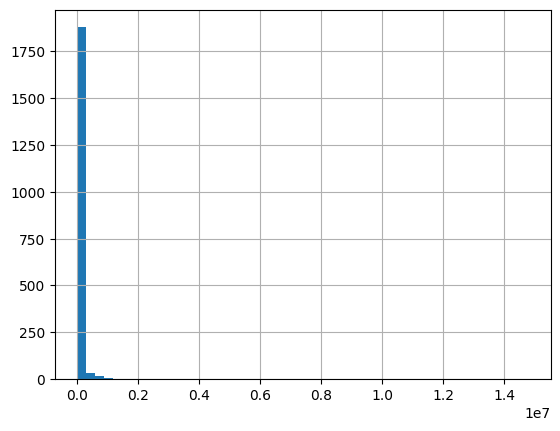

In [102]:
df_exp['valor_usd'].hist(bins=50)

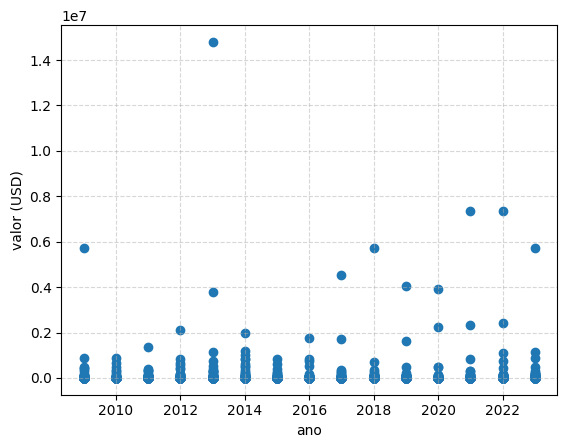

In [103]:
plt.scatter(df_exp['ano'], df_exp['valor_usd'])
plt.xlabel('ano')
plt.ylabel('valor (USD)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Análise de países com maior valor e peso

In [104]:
df_exp.groupby('País').mean(numeric_only=True)

,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
País,,,,,,,,,,
Afeganistao,2016.0,0.733333,3.066667,0.000000,0.000000,0.733333,3.066667,3.066667e-06,7.333333e-07,0.278788
Africa do Sul,2016.0,9.800000,54.266667,0.133333,2.933333,9.933333,57.200000,5.720000e-05,9.933333e-06,1.009276
Alemanha,2016.0,43207.666667,143218.466667,3385.600000,18294.266667,46593.266667,161512.733333,1.615127e-01,4.659327e-02,4.826487
Angola,2016.0,9543.133333,33673.733333,14202.200000,81793.733333,23745.333333,115467.466667,1.154675e-01,2.374533e-02,4.058828
Antigua e Barbuda,2016.0,165.800000,639.066667,9.200000,46.000000,175.000000,685.066667,6.850667e-04,1.750000e-04,1.822317
...,...,...,...,...,...,...,...,...,...,...
Tuvalu,2016.0,0.133333,0.266667,0.000000,0.000000,0.133333,0.266667,2.666667e-07,1.333333e-07,0.133333
Uruguai,2016.0,74579.200000,111609.933333,8333.333333,36697.266667,82912.533333,148307.200000,1.483072e-01,8.291253e-02,4.234928
Vanuatu,2016.0,1.200000,2.066667,0.933333,2.066667,2.133333,4.133333,4.133333e-06,2.133333e-06,0.129167


## Países com maior média de valor USD

In [105]:
media_valor_USD_por_pais = df_exp.groupby('País')[['valor_usd_M']].mean(numeric_only=True).sort_values(by='valor_usd_M', ascending=False)
media_valor_USD_por_pais.head(10)

,valor_usd_M
País,
Paraguai,2.969496
Russia,1.546840
Estados Unidos,1.273202
Reino Unido,0.415377
China,0.364904
Espanha,0.260579
Haiti,0.215551
Paises Baixos (Holanda),0.210500
Japao,0.186688


## Países que mais importaram em USD

In [106]:
valor_USD_totais_por_pais = df_exp.groupby('País')[['valor_usd_M']].sum().sort_values(by='valor_usd_M', ascending=False)
valor_USD_totais_por_pais.head(10)

,valor_usd_M
País,
Paraguai,44.542439
Russia,23.202596
Estados Unidos,19.098037
Reino Unido,6.230662
China,5.473562
Espanha,3.908688
Haiti,3.233263
Paises Baixos (Holanda),3.157503
Japao,2.800323


In [107]:
paises_maior_valor_total = valor_USD_totais_por_pais.head(10).index.to_list()
paises_maior_valor_total

['Paraguai',
 'Russia',
 'Estados Unidos',
 'Reino Unido',
 'China',
 'Espanha',
 'Haiti',
 'Paises Baixos (Holanda)',
 'Japao',
 'Alemanha']

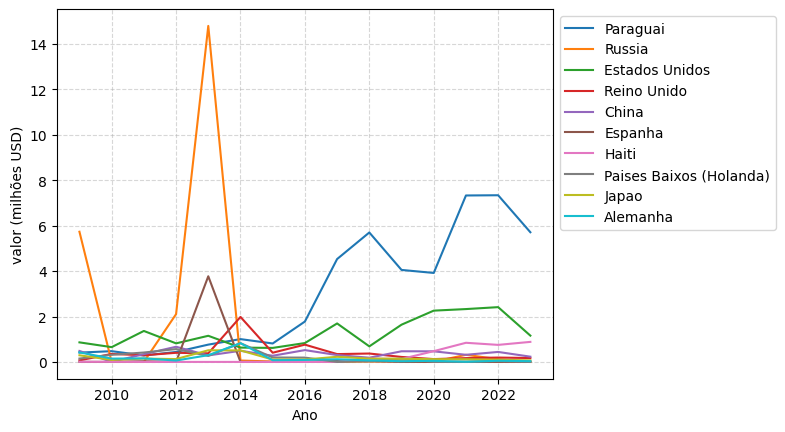

In [108]:
for p in paises_maior_valor_total:
    df_exp_vinho_pais = df_exp.query('@p in País')
    plt.plot(df_exp_vinho_pais['ano'], df_exp_vinho_pais['valor_usd_M'])
plt.legend(paises_maior_valor_total, bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('Ano')
plt.ylabel('valor (milhões USD)')
plt.grid(linestyle='--', alpha=0.5)

plt.show()

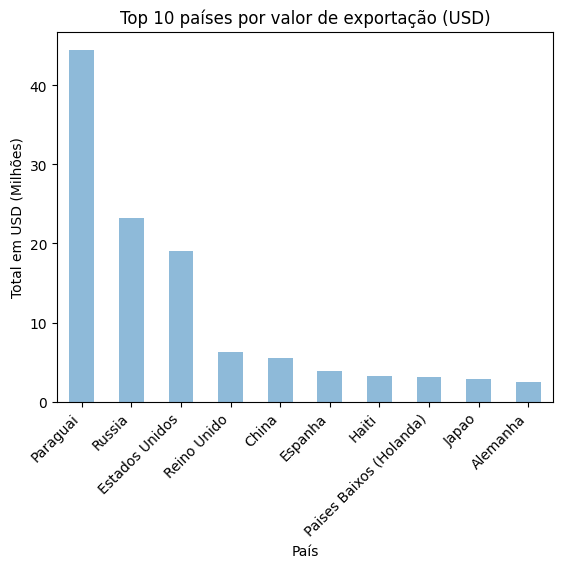

In [109]:
top_valor_usd = valor_USD_totais_por_pais.head(10)

top_valor_usd.plot(kind='bar', legend=False, alpha=0.5)
plt.title('Top 10 países por valor de exportação (USD)')
plt.ylabel('Total em USD (Milhões)')
plt.xlabel('País')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()


## Países com maior médida de peso importado (Ml)

In [110]:
df_exp.groupby('País')[['peso_Ml']].mean(numeric_only=True).sort_values(by='peso_Ml', ascending=False).head(10)

,peso_Ml
País,
Russia,2.196170
Paraguai,2.093292
Estados Unidos,0.449191
China,0.182719
Haiti,0.157760
Espanha,0.133446
Reino Unido,0.099374
Uruguai,0.082913
Japao,0.074178


## Países com maior total de peso importado (Ml)

In [111]:
peso_Ml_totais_por_pais = df_exp.groupby('País')[['peso_Ml']].sum().sort_values(by='peso_Ml', ascending=False)
peso_Ml_totais_por_pais.head(10)

,peso_Ml
País,
Russia,32.942550
Paraguai,31.399376
Estados Unidos,6.737861
China,2.740787
Haiti,2.366396
Espanha,2.001693
Reino Unido,1.490617
Uruguai,1.243688
Japao,1.112675


In [112]:
paises_maior_peso_total = peso_Ml_totais_por_pais.head(10).index.to_list()
paises_maior_peso_total

['Russia',
 'Paraguai',
 'Estados Unidos',
 'China',
 'Haiti',
 'Espanha',
 'Reino Unido',
 'Uruguai',
 'Japao',
 'Paises Baixos (Holanda)']

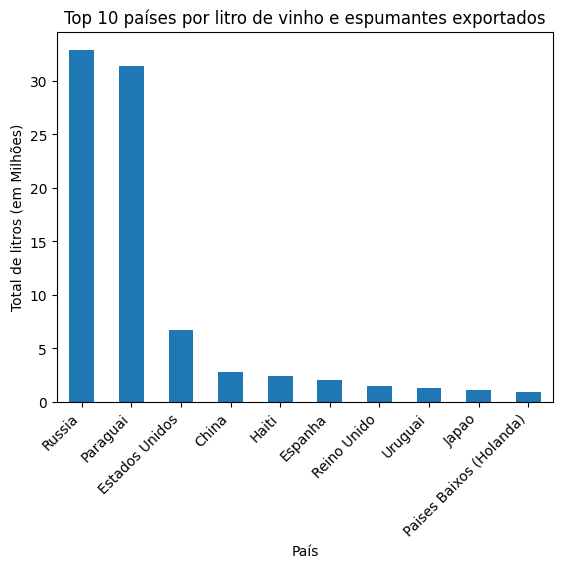

In [113]:
top_peso_kg = peso_Ml_totais_por_pais.head(10)

top_peso_kg.plot(kind='bar', legend=False)
plt.title('Top 10 países por litro de vinho e espumantes exportados')
plt.ylabel('Total de litros (em Milhões)')
plt.xlabel('País')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()


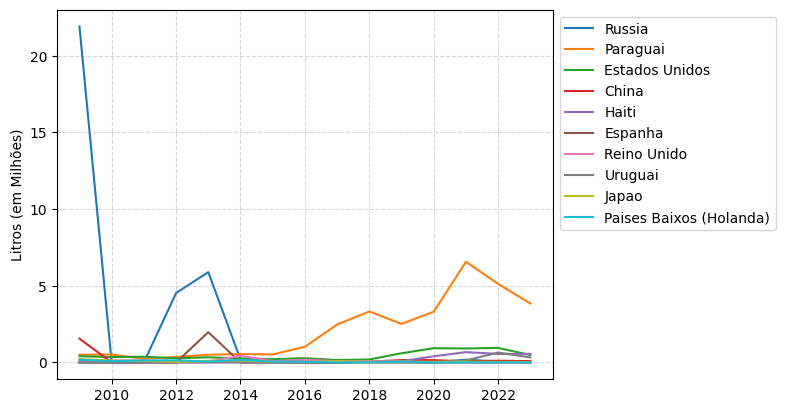

In [114]:
for p in paises_maior_peso_total:
    df_exp_vinho_pais = df_exp.query('@p in País')
    plt.plot(df_exp_vinho_pais['ano'], df_exp_vinho_pais['peso_Ml'])
plt.legend(paises_maior_peso_total, bbox_to_anchor=(1,1), loc='upper left')
plt.ylabel('Litros (em Milhões)')
plt.grid(linestyle='--', alpha=0.5)

plt.show()

## Países com maior média de valor de USD/L

In [115]:
media_usd_por_l_por_pais = df_exp.groupby('País')[['usd_por_l']].mean().sort_values(by='usd_por_l', ascending=False)
media_usd_por_l_por_pais.head(10)

,usd_por_l
País,
Camaroes,inf
Catar,22.760145
Suica,7.803683
Luxemburgo,7.345335
"Tcheca, Republica",7.054147
Australia,6.502356
Nova Zelandia,6.493092
Emirados Arabes Unidos,5.705732
Suecia,5.645881


In [116]:
paises_maior_usd_por_l = media_usd_por_l_por_pais.head(10).index.to_list()
paises_maior_usd_por_l

['Camaroes',
 'Catar',
 'Suica',
 'Luxemburgo',
 'Tcheca, Republica',
 'Australia',
 'Nova Zelandia',
 'Emirados Arabes Unidos',
 'Suecia',
 'Belgica']

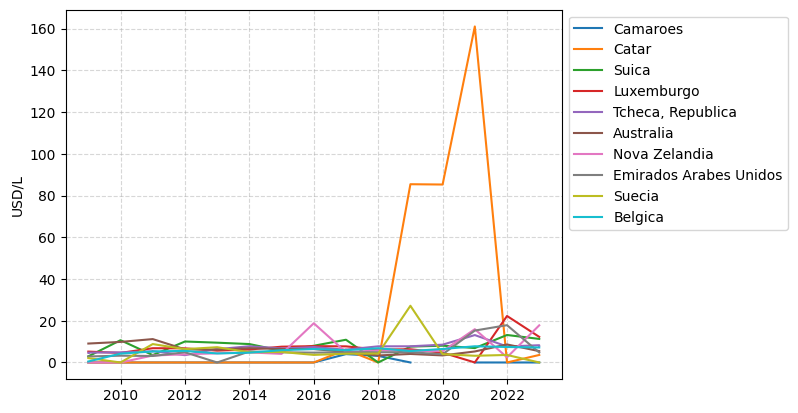

In [117]:
for p in paises_maior_usd_por_l:
    df_exp_vinho_pais = df_exp.query('@p in País')
    plt.plot(df_exp_vinho_pais['ano'], df_exp_vinho_pais['usd_por_l'])
plt.legend(paises_maior_usd_por_l, bbox_to_anchor=(1,1), loc='upper left')
plt.ylabel('USD/L')
plt.grid(linestyle='--', alpha=0.5)

plt.show()

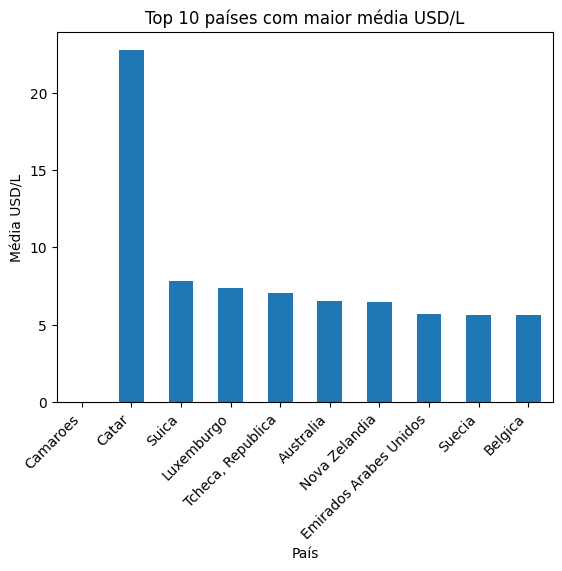

In [118]:
top_media_usd_por_l = media_usd_por_l_por_pais.head(10)
top_media_usd_por_l.plot(kind='bar', legend=False)
plt.title('Top 10 países com maior média USD/L')
plt.ylabel('Média USD/L')
plt.xlabel('País')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()


## Plotando Valor(USD) e Peso(L) dos países com maiores valores

In [119]:
paises_maior_valor_total_ou_peso = set(paises_maior_valor_total + paises_maior_peso_total)
paises_maior_valor_total_ou_peso

{'Alemanha',
 'China',
 'Espanha',
 'Estados Unidos',
 'Haiti',
 'Japao',
 'Paises Baixos (Holanda)',
 'Paraguai',
 'Reino Unido',
 'Russia',
 'Uruguai'}

In [120]:
len(paises_maior_valor_total_ou_peso)

11

In [121]:
# paises que não estão em ambos os maiores valores (valor_usd e peso_kg)
set(paises_maior_valor_total) ^ set(paises_maior_peso_total)

{'Alemanha', 'Uruguai'}

<Figure size 1200x600 with 0 Axes>

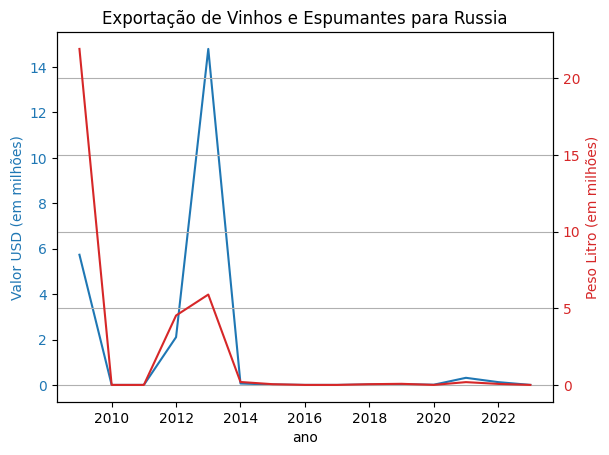

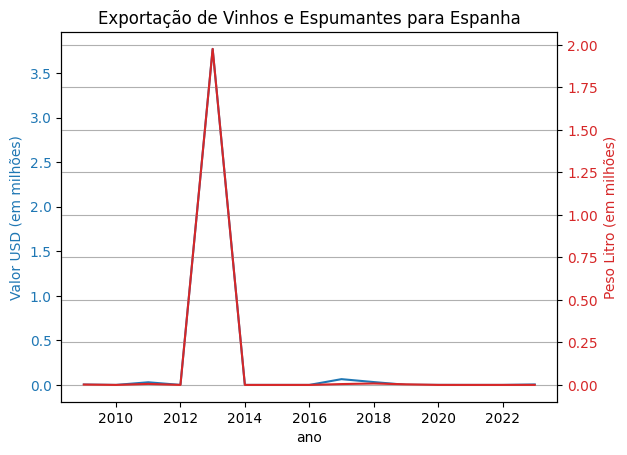

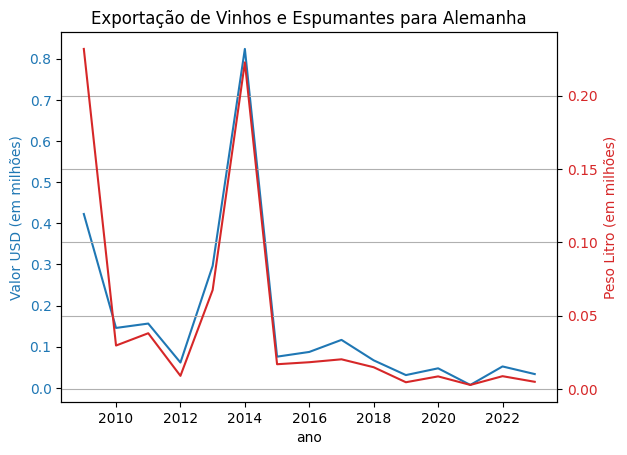

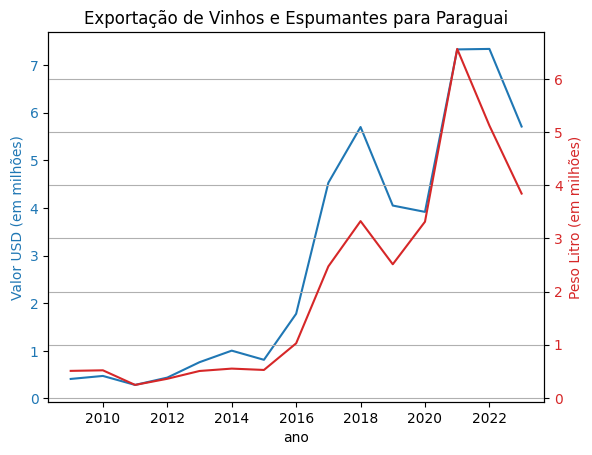

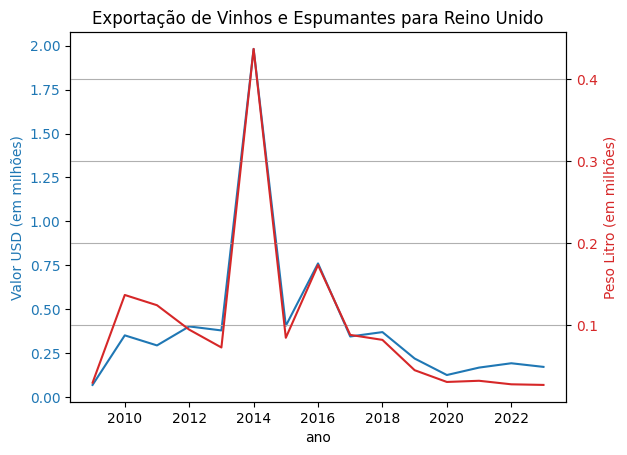

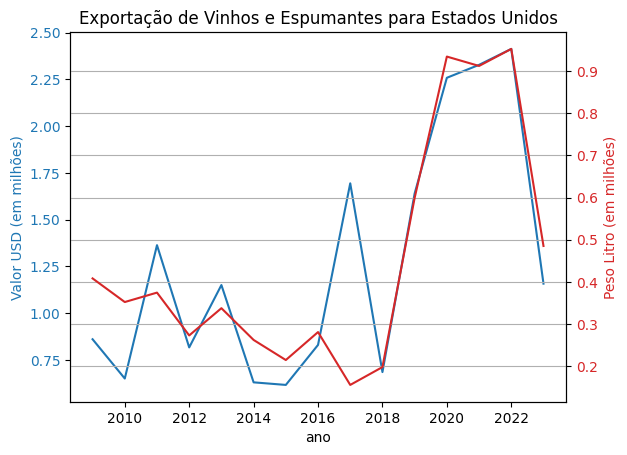

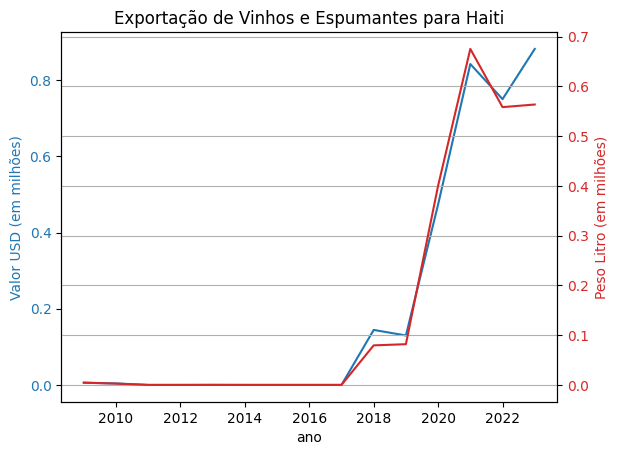

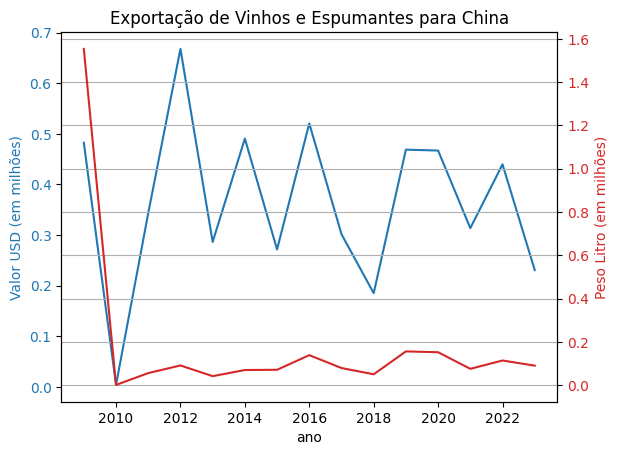

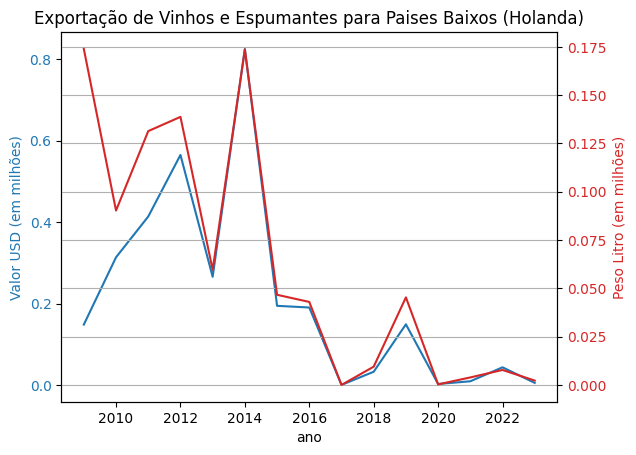

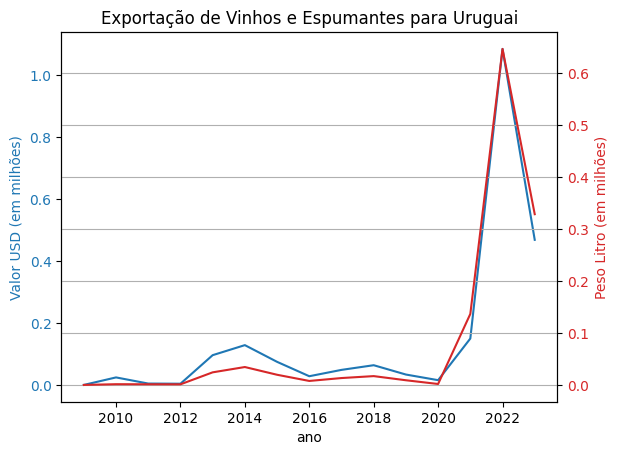

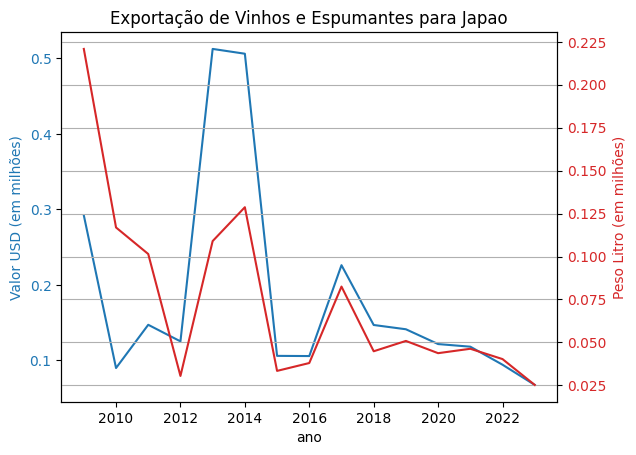

In [122]:
plt.figure(figsize=(12,6))

for p in paises_maior_valor_total_ou_peso:
  fig, ax1 = plt.subplots()

  df_exp_vinho_pais = df_exp[df_exp['País'] == p]

  x = df_exp_vinho_pais['ano']

  color = 'tab:blue'
  y = df_exp_vinho_pais['valor_usd_M']
  ax1.set_xlabel('ano')
  ax1.set_ylabel('Valor USD (em milhões)', color=color)
  ax1.plot(x, y, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:red'
  y = df_exp_vinho_pais['peso_Ml']
  ax2.set_xlabel('ano')
  ax2.set_ylabel('Peso Litro (em milhões)', color=color)
  ax2.plot(x, y, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  plt.title(f"Exportação de Vinhos e Espumantes para {p}")
  plt.grid(True)

  plt.show()

# Análise por ano

In [123]:
df_exp_total_por_ano = df_exp.groupby('ano')[['peso_Ml', 'valor_usd_M', 'usd_por_l']].sum()
df_exp_total_por_ano

,peso_Ml,valor_usd_M,usd_por_l
ano,,,
2009,25.613448,9.331441,128.387072
2010,1.668825,3.696220,164.385000
2011,1.333562,4.220781,211.847290
2012,5.956160,6.362991,253.819395
2013,9.367457,23.697020,199.113362
2014,2.780864,9.617216,210.519970
2015,1.346058,3.496999,187.360013
2016,1.964435,5.175168,198.776445
2017,3.149064,8.332025,264.370322


<Figure size 1200x600 with 0 Axes>

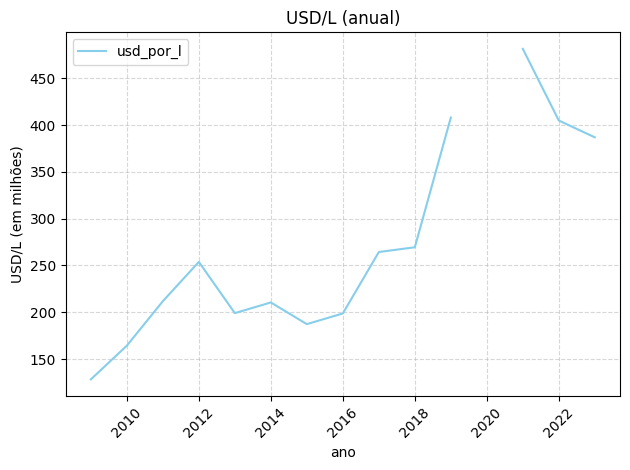

In [124]:
plt.figure(figsize=(12,6))

media_usd_por_kg = df_exp_total_por_ano['usd_por_l'].mean()

ax1 = df_exp_total_por_ano.plot(y='usd_por_l', color='skyblue')
ax1.set_xlabel('ano')
ax1.set_ylabel('USD/L (em milhões)')
plt.title('USD/L (anual)')
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axhline(media_usd_por_kg, linestyle='--', color='black', linewidth=1)
plt.show()

<Figure size 1200x600 with 0 Axes>

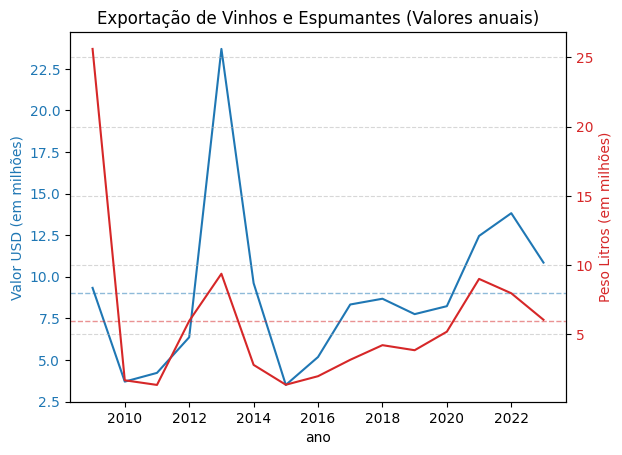

In [125]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()

color = 'tab:blue'
y = df_exp_total_por_ano['valor_usd_M']
ax1.set_xlabel('ano')
ax1.set_ylabel('Valor USD (em milhões)', color=color)
ax1.plot(y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
media_valor_usd_M = df_exp_total_por_ano['valor_usd_M'].mean()
plt.axhline(media_valor_usd_M, linestyle='--', color=color, linewidth=1, alpha=0.5)

ax2 = ax1.twinx()

color = 'tab:red'
y = df_exp_total_por_ano['peso_Ml']
ax2.set_xlabel('ano')
ax2.set_ylabel('Peso Litros (em milhões)', color=color)
ax2.plot(y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
media_peso_kg_M = df_exp_total_por_ano['peso_Ml'].mean()
plt.axhline(media_peso_kg_M, linestyle='--', color=color, linewidth=1, alpha=0.5)


plt.title("Exportação de Vinhos e Espumantes (Valores anuais)")
plt.grid(linestyle='--', alpha=0.5)

plt.show()

In [126]:
df_exp_total_por_ano.query('ano == 2009')

,peso_Ml,valor_usd_M,usd_por_l
ano,,,
2009,25.613448,9.331441,128.387072


## Mesmo removendo países que não tem nenhuma medida, 57% dos países tem algum ano sem medidas

In [127]:
df_exp.query('peso_l == 0 & valor_usd == 0')

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
0,Afeganistao,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afeganistao,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afeganistao,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afeganistao,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afeganistao,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2120,Vietna,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2121,Vietna,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2122,Vietna,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2123,Vietna,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
len(df_exp.query('peso_l == 0 & valor_usd == 0')) / len(df_exp)

0.5743589743589743

In [129]:
df_exp.query("País == 'Afeganistão'")

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l


In [130]:
df_exp.query("País == 'Afeganistão' & peso_l != 0 & valor_usd != 0")

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l


In [131]:
df_exp.query("País == 'Áustria' & peso_l != 0 & valor_usd != 0")

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l


In [132]:
len(df_exp.query("País == 'Áustria' & peso_l != 0 & valor_usd != 0"))

0

In [133]:
anos_com_medida_por_pais = {}
for p in df_exp['País'].unique():
    anos_com_medida = ((df_exp['País'] == p) & (df_exp['valor_usd'] != 0) & (df_exp['peso_l'] != 0)).sum()
    anos_com_medida_por_pais[p] = anos_com_medida
anos_com_medida_por_pais

{'Afeganistao': 1,
 'Africa do Sul': 3,
 'Alemanha': 15,
 'Angola': 14,
 'Antigua e Barbuda': 6,
 'Antilhas Holandesas': 9,
 'Arabia Saudita': 1,
 'Argentina': 8,
 'Aruba': 3,
 'Australia': 15,
 'Austria': 2,
 'Bahamas': 10,
 'Bangladesh': 3,
 'Barbados': 5,
 'Barein': 5,
 'Belgica': 15,
 'Belice': 1,
 'Benin': 4,
 'Bermudas': 2,
 'Bolivia': 14,
 'Bosnia-Herzegovina': 2,
 'Brasil': 2,
 'Bulgaria': 2,
 'Cabo Verde': 4,
 'Camaroes': 2,
 'Canada': 14,
 'Catar': 5,
 'Cayman, Ilhas': 6,
 'Chile': 9,
 'China': 15,
 'Chipre': 6,
 'Cingapura': 11,
 'Cocos (Keeling), Ilhas': 1,
 'Colombia': 10,
 'Comores': 1,
 'Congo': 2,
 'Coreia do Sul, Republica da': 9,
 'Costa Rica': 2,
 'Croacia': 2,
 'Cuba': 7,
 'Curacao': 7,
 'Dinamarca': 15,
 'Dominica': 2,
 'El Salvador': 3,
 'Emirados Arabes Unidos': 14,
 'Equador': 4,
 'Espanha': 8,
 'Estados Unidos': 15,
 'Estonia': 5,
 'Falkland (Malvinas)': 1,
 'Filipinas': 6,
 'Finlandia': 7,
 'Franca': 14,
 'Gana': 6,
 'Gibraltar': 2,
 'Granada': 1,
 'Grecia': 6

In [134]:
df_tem_medidas = df_exp[(df_exp['valor_usd'] != 0) & (df_exp['peso_l'] != 0)]
df_tem_medidas

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
12,Afeganistao,2021,11.0,46.0,0.0,0.0,11.0,46.0,0.000046,0.000011,4.181818
25,Africa do Sul,2019,26.0,95.0,0.0,0.0,26.0,95.0,0.000095,0.000026,3.653846
26,Africa do Sul,2020,4.0,21.0,0.0,0.0,4.0,21.0,0.000021,0.000004,5.250000
29,Africa do Sul,2023,117.0,698.0,2.0,44.0,119.0,742.0,0.000742,0.000119,6.235294
30,Alemanha,2009,225086.0,393482.0,6648.0,29018.0,231734.0,422500.0,0.422500,0.231734,1.823211
...,...,...,...,...,...,...,...,...,...,...,...
2125,Vietna,2019,20.0,32.0,0.0,0.0,20.0,32.0,0.000032,0.000020,1.600000
2126,Vietna,2020,86.0,584.0,0.0,0.0,86.0,584.0,0.000584,0.000086,6.790698
2127,Vietna,2021,0.0,0.0,144.0,374.0,144.0,374.0,0.000374,0.000144,2.597222
2128,Vietna,2022,130.0,277.0,16.0,19.0,146.0,296.0,0.000296,0.000146,2.027397


## Países com maior frequência de importação de vinho brasileiro

In [135]:
df_anos_com_medida = df_tem_medidas.groupby('País')[['ano']].nunique().sort_values(by='ano', ascending=False).rename(columns={'ano':'contagem de anos'})
df_anos_com_medida.head(10)

,contagem de anos
País,
Australia,15
Japao,15
Belgica,15
Paraguai,15
Estados Unidos,15
China,15
"Tcheca, Republica",15
Reino Unido,15
Dinamarca,15


In [136]:
df_anos_com_medida.describe()

,contagem de anos
count,129.000000
mean,6.310078
std,4.927281
min,1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,15.000000


In [137]:
df_anos_com_medida.value_counts()

contagem de anos
1                   25
2                   18
14                  13
3                   12
6                   11
15                  10
5                    8
10                   7
9                    6
4                    5
7                    4
11                   4
8                    3
13                   3
Name: count, dtype: int64

In [138]:
df_pais_com_medidas_por_ano = df_tem_medidas.groupby('ano')[['País']].nunique()
df_pais_com_medidas_por_ano

,País
ano,
2009,39
2010,39
2011,47
2012,42
2013,39
2014,41
2015,33
2016,39
2017,42


<Axes: title={'center': 'Contagem de países com medidas por ano'}, xlabel='ano', ylabel='contagem'>

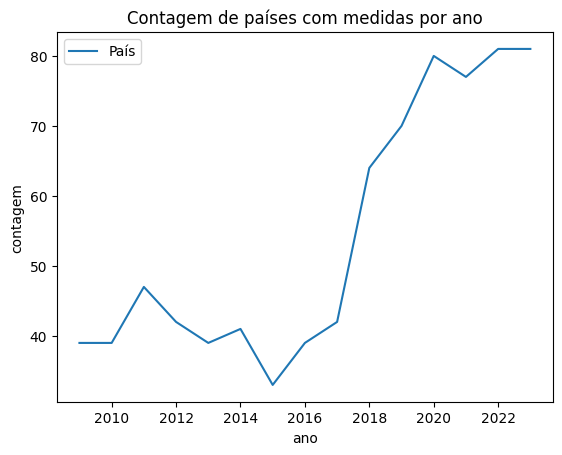

In [139]:
df_pais_com_medidas_por_ano.plot(title = 'Contagem de países com medidas por ano', ylabel='contagem')

# Previsões com Regressão Linear

## Previsão com método dos mínimos quadrados na mão

In [140]:
def min_square(X, Y, n):
    if len(Y) < n:
        return np.nan
    a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)
    b = np.mean(Y) - a * np.mean(X)
    return (a,b)

In [141]:
anos = df_exp_total_por_ano.index
anos

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023],
      dtype='int64', name='ano')

In [142]:
anos_previsao = np.arange(2024, 2026+1)
anos_previsao

array([2024, 2025, 2026])

## Previsão Valor(USD) e Peso(L) Anuais

In [143]:
(a, b) = min_square(anos, df_exp_total_por_ano['valor_usd_M'], anos.size)
(a, b)

(0.2683932357140639, -532.0328564662195)

In [144]:
anos_previsao_valor_usd = a * anos_previsao + b
anos_previsao_valor_usd

array([11.19505262, 11.46344585, 11.73183909])

In [145]:
(a, b) = min_square(anos, df_exp_total_por_ano['peso_Ml'], anos.size)
(a, b)

(-0.27139521428594543, 553.0929171337993)

In [146]:
anos_previsao_peso_l = a * anos_previsao + b
anos_previsao_peso_l

array([3.78900342, 3.5176082 , 3.24621299])

NameError: name 'anos_previsao_peso_kg' is not defined

<Figure size 1200x600 with 0 Axes>

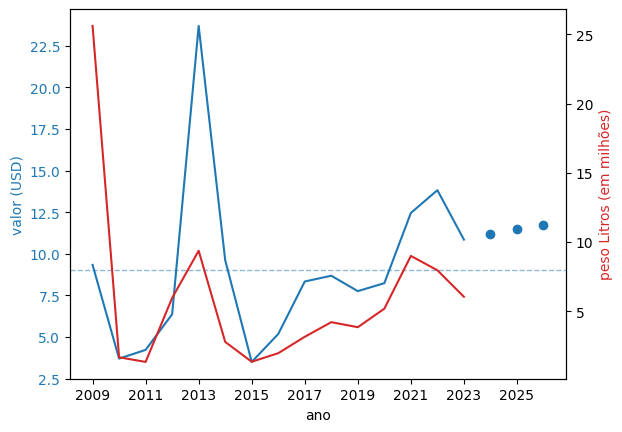

In [147]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()

anos = df_exp_total_por_ano.index
xticks = df_exp_total_por_ano.index.to_list() + list(anos_previsao)

color = 'tab:blue'
y = df_exp_total_por_ano['valor_usd_M']
ax1.set_xlabel('ano')
ax1.set_ylabel('valor (USD)', color=color)
ax1.plot(anos, y, color=color)
ax1.plot(anos_previsao, anos_previsao_valor_usd, 'o', color=color, label='Previsão Valor(USD)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(xticks[::2])
media_valor_usd_M = df_exp_total_por_ano['valor_usd_M'].mean()
plt.axhline(media_valor_usd_M, linestyle='--', color=color, linewidth=1, alpha=0.5)

ax2 = ax1.twinx()

color = 'tab:red'
y = df_exp_total_por_ano['peso_Ml']
ax2.set_xlabel('ano')
ax2.set_ylabel('peso Litros (em milhões)', color=color)
ax2.plot(anos, y, color=color)
ax2.plot(anos_previsao, anos_previsao_peso_kg, 's', color=color, label='Previsão Peso(Milhões de Litros)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(xticks[::2])
media_peso_kg_M = df_exp_total_por_ano['peso_Ml'].mean()
plt.axhline(media_peso_kg_M, linestyle='--', color=color, linewidth=1, alpha=0.5)

plt.axvline(2023, linestyle='--', color='black', linewidth=1, alpha=0.5)

plt.title("Exportação de Vinhos e Espumantes (Valores anuais)")
plt.grid(linestyle='--', alpha=0.5)

plt.show()

## Previsão USD/L Anual

In [ ]:
(a, b) = min_square(anos, df_exp_total_por_ano['usd_por_l'], anos.size)
(a, b)

(21.52432545738206, -43114.748740120536)

In [ ]:
anos_previsao_usd_por_l = a * anos_previsao + b
anos_previsao_usd_por_l

array([450.48598562, 472.01031108, 493.53463654])

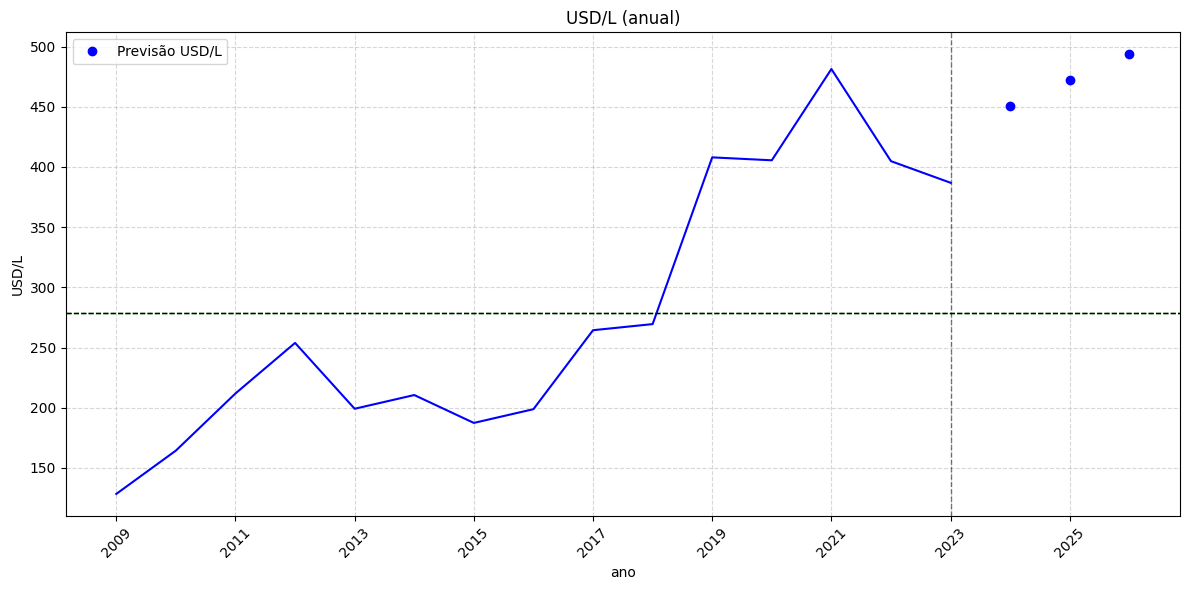

In [ ]:
plt.figure(figsize=(12,6))

anos = df_exp_total_por_ano.index
xticks = df_exp_total_por_ano.index.to_list() + list(anos_previsao)

media_usd_por_l = df_exp_total_por_ano['usd_por_l'].mean()

plt.plot(anos, df_exp_total_por_ano['usd_por_l'], color='blue')
plt.plot(anos_previsao, anos_previsao_usd_por_l, 'o', color='blue', label='Previsão USD/L')
plt.axhline(media_usd_por_l, linestyle='--', color='g', linewidth=1)
plt.axvline(2023, linestyle='--', color='black', linewidth=1, alpha=0.5)
plt.xlabel('ano')
plt.ylabel('USD/L')
plt.title('USD/L (anual)')
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(xticks[::2], rotation=45)
plt.legend()
plt.tight_layout()
plt.axhline(media_usd_por_l, linestyle='--', color='black', linewidth=1)
plt.show()

## Previsões para países com maiores valor em USD e peso em kg

<Figure size 1200x600 with 0 Axes>

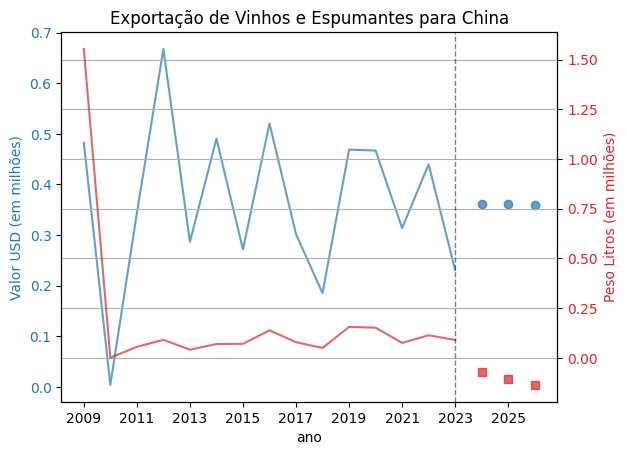

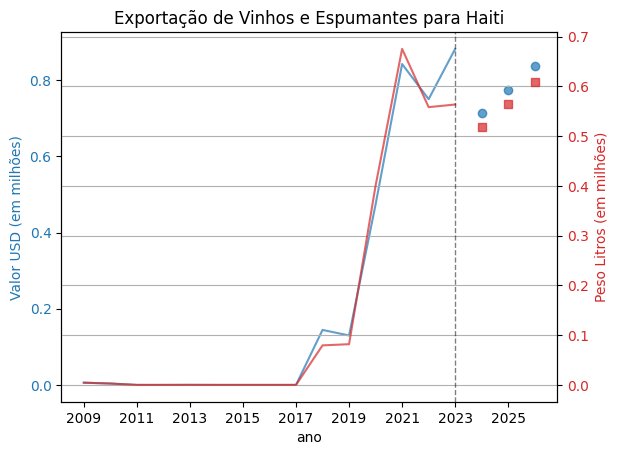

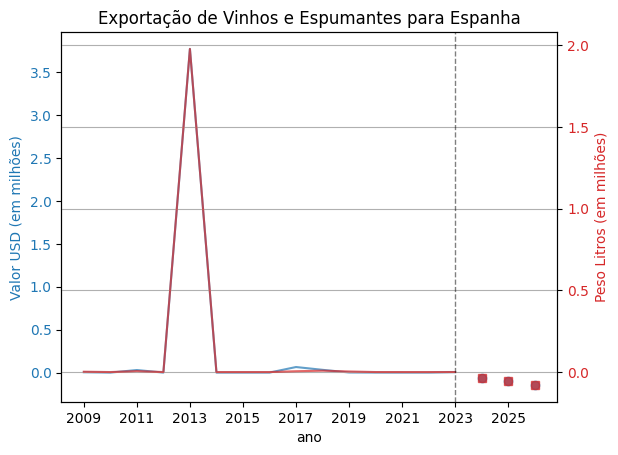

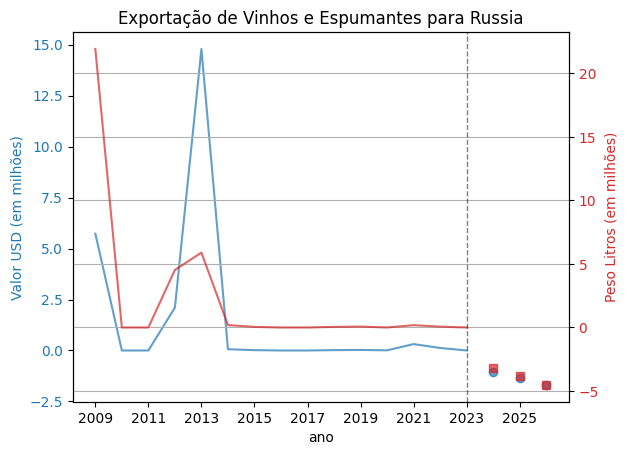

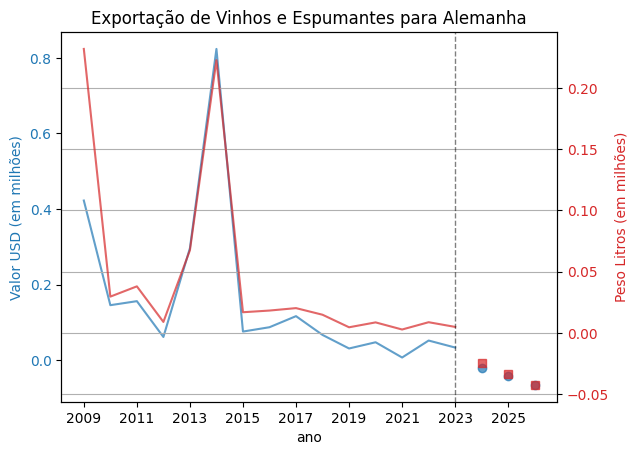

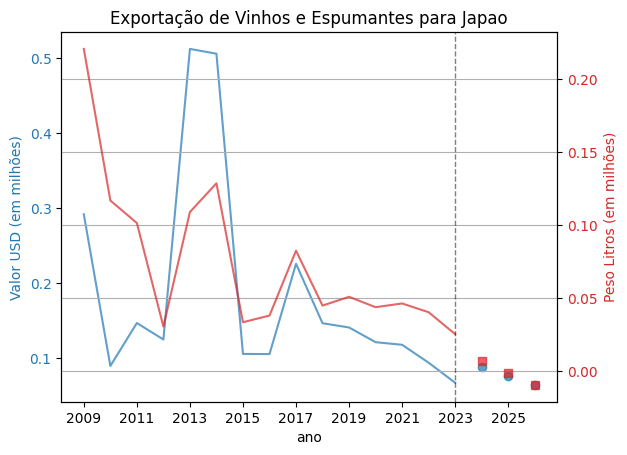

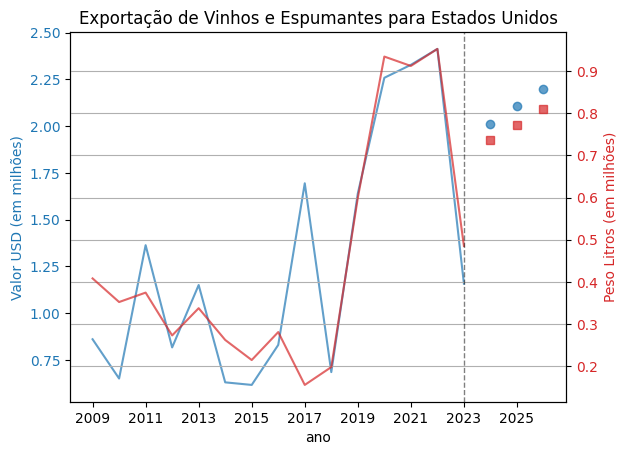

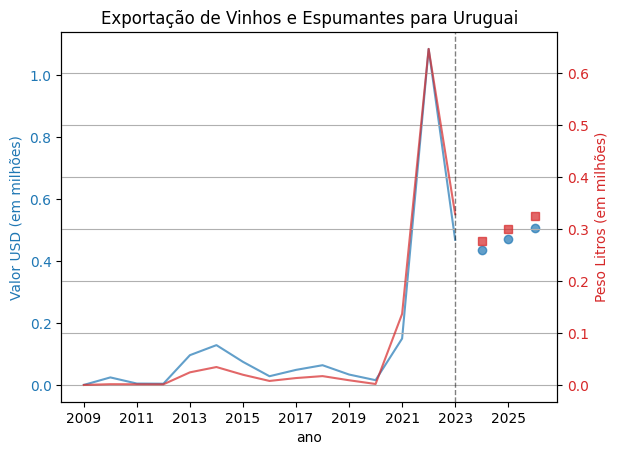

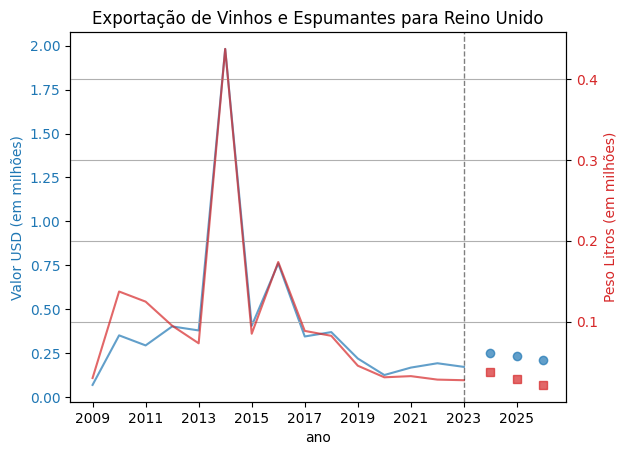

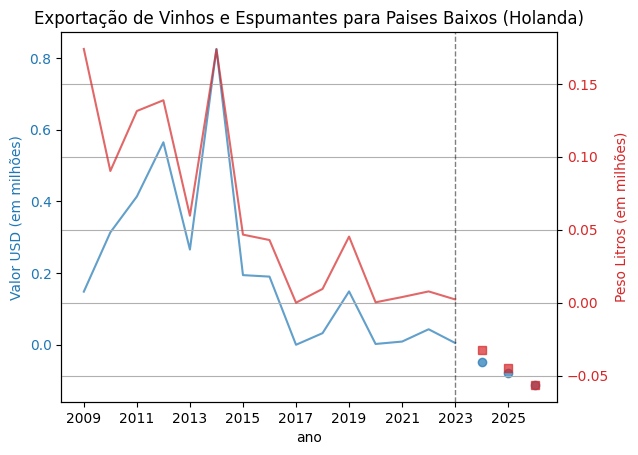

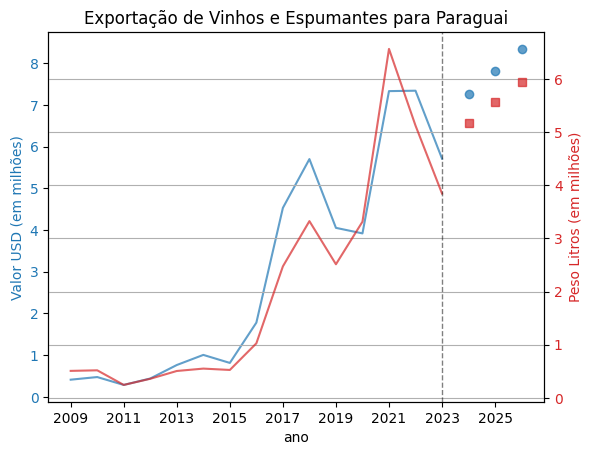

In [ ]:
plt.figure(figsize=(12,6))

for p in paises_maior_valor_total_ou_peso:
  fig, ax1 = plt.subplots()

  df_exp_vinho_pais = df_exp[df_exp['País'] == p]

  anos = df_exp_total_por_ano.index
  anos_previsao = np.arange(2024, 2026+1)

  xticks = anos.to_list() + list(anos_previsao)

  color = 'tab:blue'
  (a, b) = min_square(anos, df_exp_vinho_pais['valor_usd_M'], anos.size)
  anos_previsao_valor_usd = a * anos_previsao + b
  ax1.set_xlabel('ano')
  ax1.set_ylabel('Valor USD (em milhões)', color=color)
  ax1.plot(anos, df_exp_vinho_pais['valor_usd_M'], color=color, alpha=0.7)
  ax1.plot(anos_previsao, anos_previsao_valor_usd, 'o', color=color, alpha=0.7)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:red'
  (a, b) = min_square(anos, df_exp_vinho_pais['peso_Ml'], anos.size)
  anos_previsao_peso_kg = a * anos_previsao + b
  ax2.set_xlabel('ano')
  ax2.set_ylabel('Peso Litros (em milhões)', color=color)
  ax2.plot(anos, df_exp_vinho_pais['peso_Ml'], color=color, alpha=0.7)
  ax2.plot(anos_previsao, anos_previsao_peso_kg, 's', color=color, alpha=0.7)
  ax2.tick_params(axis='y', labelcolor=color)

  plt.title(f"Exportação de Vinhos e Espumantes para {p}")
  plt.grid(True)
  plt.axvline(2023, linestyle='--', color='black', linewidth=1, alpha=0.5)
  plt.xticks(xticks[::2], rotation=45)

  plt.show()

# Fatores Externos a considerar

## Dados Climáticos

Dados climáticos podem impactar diretamente a produção de vinho e a demanda em diferentes mercados. Você pode:

- **Obter dados históricos e previsões climáticas** para as principais regiões vinícolas do Brasil e países de destino.
- **Analisar a relação entre variações climáticas e a produção/exportação de vinhos**, como qualidade e volume de vinho produzido.
- **Prever possíveis mudanças na demanda** em diferentes países baseados em padrões climáticos, como o aumento de consumo de vinhos brancos em climas mais quentes.

## Dados Demográficos

Mudanças demográficas podem influenciar as preferências e o poder de compra. Para incorporar esses dados:

- **Incluir dados sobre a população, faixa etária, e renda ** dos países de destino.
- **Analisar tendências de consumo por demografia** para direcionar campanhas de marketing.
- **Desenvolver produtos** que atendam às preferências de grupos demográficos específicos.

## Dados Econômicos

A situação econômica dos países pode afetar as importações de vinho. Você pode:

- **Integrar dados sobre o PIB, taxa de câmbio e indicadores de consumo** para cada país de destino.
- **Avaliar o impacto de crises econômicas** na demanda por vinhos brasileiros.
- **Identificar mercados com forte potencial de crescimento** econômico para focar esforços de expansão.

## Dados de Avaliações de Vinhos

As avaliações podem influenciar a percepção do mercado sobre a qualidade do vinho. Para usar esses dados:

- **Coletar avaliações e pontuações de vinhos brasileiros** de fontes confiáveis como críticos de vinhos e concursos internacionais.
- **Correlacionar a percepção de qualidade com as vendas** em diferentes mercados.
- **Usar feedback para melhorar a qualidade dos vinhos** e estratégias de marketing.

# Pontos de atenção

## Muitos Valores Ausentes

- **Investigar a origem dos dados:** Verificar se a falta de dados é devido a problemas na coleta, na transmissão, ou se alguns países não reportam todos os dados anualmente.
- **Estratégias de tratamento:** Considerar métodos para tratar dados ausentes, como imputação baseada em médias, medianas, ou modelos preditivos, dependendo do caso.

## Possível Correlação entre IDH e USD/KG

- **Análise Estatística:** Realizar testes de correlação e análises regressivas para explorar a relação entre o IDH dos países e o valor médio por kg exportado, considerando ajustes por outros fatores econômicos.


## Análise de Picos e Variações Específicas

- **Rússia em 2009 e 2013:** Investigar eventos específicos, como mudanças políticas, acordos comerciais ou promoções de marketing que possam ter influenciado as exportações.
- **Espanha em 2013:** Similar ao caso da Rússia, pode ser útil explorar eventos locais ou campanhas de marketing intensivas.
- **Paraguai a partir de 2016:** Analisar a continuidade das relações comerciais e possíveis acordos bilaterais que favoreçam essa parceria.
- **Panamá em 2012:** O alto valor USD/kg pode indicar exportação de produtos de alto valor agregado ou erros de registro. Verificar a natureza dos produtos exportados nesse ano.
- **Outros picos de USD/KG:** Como Nova Zelândia em 2016 e Suécia em 2017, explorar se foram exportados vinhos de categorias premium ou se houve alterações no câmbio que impactaram os valores.
- **EUA em 2017 e 2020:** Investigar se eventos como mudanças fiscais, tarifas de importação ou preferências de consumo podem ter causado essas variações.
- **Japão em 2013 e 2014:** Explorar se houve eventos ou campanhas específicas que elevaram o valor das exportações sem necessariamente aumentar o volume.
- **Reino Unido em 2014 e China em 2010:** Avaliar o contexto econômico e político desses anos, assim como mudanças no mercado de vinhos e nas preferências dos consumidores.


# Ideias de Objetivos de Análise

## Maximizar a Rentabilidade das Exportações

**Objetivo:** Analisar os dados de exportação para identificar os mercados mais lucrativos e os produtos que geram maior margem de lucro. Avaliar o custo de produção e exportação em relação ao retorno em diferentes mercados para otimizar a alocação de recursos e maximizar a rentabilidade.

## Resiliência e Adaptação a Fatores Externos

**Objetivo:** Integrar análises de dados econômicos, climáticos, e outras variáveis externas para desenvolver um plano de ação que aumente a resiliência da empresa frente a adversidades. Isso inclui a adaptação a mudanças no clima que possam afetar a produção, bem como estratégias para lidar com flutuações econômicas e crises que impactem o consumo e as exportações.

## Aprimoramento da Qualidade do Produto

**Objetivo:** Analisar correlações entre as avaliações de vinhos e os dados de vendas para entender melhor as preferências do consumidor e as tendências do mercado. Utilizar essas informações para orientar a produção de vinhos que atendam ou superem as expectativas dos consumidores, melhorando a qualidade e a imagem dos produtos no mercado internacional.

## Ampliar a Base de Clientes e Mercados

**Objetivo:** Explorar dados demográficos e de avaliações de vinhos para identificar novos segmentos de clientes e mercados potenciais. Desenvolver estratégias de marketing e produtos customizados que atendam às preferências e necessidades desses novos grupos, visando ampliar a base de clientes e a penetração de mercado.





# **POPULACAO MUNDIAL POR PAIS**

In [ ]:
import pandas as pd

# URL do artigo da Wikipedia
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_popula%C3%A7%C3%A3o'

# Ler as tabelas HTML da página usando pandas.read_html()
tabela_populacao = pd.read_html(url)
#seleciona as tabelas direto do html
tabela_populacao = tabela_populacao[0]
#escolhe a tabela que desejamos
tabela_populacao

,Unnamed: 0,Posição,País (ou território dependente),Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,NaN,1,Índia,1 429 921 746,+269.108.746,Estimativa oficial
1,NaN,2,China,1 426 391 281,+87.778.313,Censo oficial
2,NaN,3,Estados Unidos,339 987 103,+31.241.565,Censo oficial
3,NaN,4,Indonésia,277 184 719,+33.168.546,Estimativa oficial
4,NaN,5,Paquistão,240 215 932,+65.636.932,Estimativa oficial
...,...,...,...,...,...,...
245,NaN,–,Ilha de Ascensão (Reino Unido),1 100,NaN,Estimativa oficial[10]
246,NaN,195,Vaticano,825,NaN,Estimativa oficial
247,NaN,–,Ilhas Cocos (Keeling) (Austrália),596,NaN,Estimativa oficial
248,NaN,–,Tristão da Cunha (Reino Unido),264,NaN,Estimativa oficial[11]


In [ ]:
tabela_populacao = tabela_populacao.drop('Unnamed: 0', axis=1)

In [ ]:
# Mover a coluna País para a primeira posição
coluna_a_mover = tabela_populacao.pop('País (ou território dependente)')  # Remove a coluna 'B' e a retorna
tabela_populacao.insert(0, 'País (ou território dependente)', coluna_a_mover)  # Insere a coluna 'B' na primeira posição
tabela_populacao.head()

,País (ou território dependente),Posição,Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,Índia,1,1 429 921 746,+269.108.746,Estimativa oficial
1,China,2,1 426 391 281,+87.778.313,Censo oficial
2,Estados Unidos,3,339 987 103,+31.241.565,Censo oficial
3,Indonésia,4,277 184 719,+33.168.546,Estimativa oficial
4,Paquistão,5,240 215 932,+65.636.932,Estimativa oficial


In [ ]:
# Renomeando a coluna
tabela_populacao = tabela_populacao.rename(columns={'País (ou território dependente)': 'País'})
tabela_populacao = tabela_populacao.rename(columns={'Posição': 'Posicao'})
tabela_populacao = tabela_populacao.rename(columns={'Estimativa da ONU': 'Populacao'})
tabela_populacao.head()

,País,Posicao,Populacao,Crescimento desde a última estimativa,Estimativa Oficial
0,Índia,1,1 429 921 746,+269.108.746,Estimativa oficial
1,China,2,1 426 391 281,+87.778.313,Censo oficial
2,Estados Unidos,3,339 987 103,+31.241.565,Censo oficial
3,Indonésia,4,277 184 719,+33.168.546,Estimativa oficial
4,Paquistão,5,240 215 932,+65.636.932,Estimativa oficial


In [ ]:
# Transformar a coluna País na coluna de índice
tabela_populacao.set_index('País', inplace=True)
tabela_populacao.head()


,Posicao,Populacao,Crescimento desde a última estimativa,Estimativa Oficial
País,,,,
Índia,1,1 429 921 746,+269.108.746,Estimativa oficial
China,2,1 426 391 281,+87.778.313,Censo oficial
Estados Unidos,3,339 987 103,+31.241.565,Censo oficial
Indonésia,4,277 184 719,+33.168.546,Estimativa oficial
Paquistão,5,240 215 932,+65.636.932,Estimativa oficial


In [ ]:
tabela_populacao.info()
#tabela_populacao['Estimativa da ONU'] = tabela_populacao['Estimativa da ONU'].replace(" ", "")
#tabela_populacao.head()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Índia to Ilhas Pitcairn (Reino Unido)
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Posicao                                250 non-null    object
 1   Populacao                              250 non-null    object
 2   Crescimento desde a última estimativa  13 non-null     object
 3   Estimativa Oficial                     250 non-null    object
dtypes: object(4)
memory usage: 9.8+ KB


In [ ]:
# Removendo a colunas
tabela_populacao = tabela_populacao.drop(columns=['Crescimento desde a última estimativa'])
tabela_populacao = tabela_populacao.drop(columns=['Estimativa Oficial'])
tabela_populacao.head()


,Posicao,Populacao
País,,
Índia,1,1 429 921 746
China,2,1 426 391 281
Estados Unidos,3,339 987 103
Indonésia,4,277 184 719
Paquistão,5,240 215 932


In [ ]:
tabela_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Índia to Ilhas Pitcairn (Reino Unido)
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posicao    250 non-null    object
 1   Populacao  250 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [ ]:
# Remover espaços em branco da coluna 'coluna_objeto'
tabela_populacao['Populacao'] = tabela_populacao['Populacao'].str.replace(' ', '')
# Convertendo a coluna 'coluna_objeto' para numérica
tabela_populacao['Populacao'] = pd.to_numeric(tabela_populacao['Populacao'])
tabela_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Índia to Ilhas Pitcairn (Reino Unido)
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posicao    250 non-null    object
 1   Populacao  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


# **FAIXA ETARIA**

In [ ]:
# URL do artigo da Wikipedia
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_esperan%C3%A7a_m%C3%A9dia_de_vida_%C3%A0_nascen%C3%A7a'

# Ler as tabelas HTML da página usando pandas.read_html()
tabela_faixa_etaria = pd.read_html(url)
#seleciona as tabelas direto do html
tabela_faixa_etaria = tabela_faixa_etaria[1]
#escolhe a tabela que desejamos
tabela_faixa_etaria

,Unnamed: 0,País,Expectativa de vida geral,Expectativa de vida masculina,Rank masculino,Expectativa de vida feminina,Rank feminino
0,1,Japão,88,86,1,90,1
1,2,Andorra,84.2,80.8,8,87.6,2
2,3,Singapura,84,82,2,87,3
3,4,Hong Kong,83.8,82,2,85.6,5
4,5,San Marino,83.5,82,2,85,11
...,...,...,...,...,...,...,...
187,189,Essuatíni,50,49,185,51,190
188,190,Somália,50,48,186,52,187
189,191,República do Congo,49.5,48,186,51,190
190,192,República Centro-Africana,48.5,47,187,50,192


In [ ]:
tabela_faixa_etaria = tabela_faixa_etaria.drop('Unnamed: 0', axis=1)

In [ ]:
tabela_faixa_etaria.head()

,País,Expectativa de vida geral,Expectativa de vida masculina,Rank masculino,Expectativa de vida feminina,Rank feminino
0,Japão,88,86,1,90,1
1,Andorra,84.2,80.8,8,87.6,2
2,Singapura,84,82,2,87,3
3,Hong Kong,83.8,82,2,85.6,5
4,San Marino,83.5,82,2,85,11


In [ ]:
# Renomeando a coluna
tabela_faixa_etaria = tabela_faixa_etaria.rename(columns={'Expectativa de vida  geral': 'Expectativa_Geral'})
tabela_faixa_etaria = tabela_faixa_etaria.rename(columns={'Expectativa de vida masculina': 'Expectativa_Masculina'})
tabela_faixa_etaria = tabela_faixa_etaria.rename(columns={'Expectativa de vida feminina': 'Expectativa_Feminina'})
tabela_faixa_etaria.head()

,País,Expectativa_Geral,Expectativa_Masculina,Rank masculino,Expectativa_Feminina,Rank feminino
0,Japão,88,86,1,90,1
1,Andorra,84.2,80.8,8,87.6,2
2,Singapura,84,82,2,87,3
3,Hong Kong,83.8,82,2,85.6,5
4,San Marino,83.5,82,2,85,11


In [ ]:
tabela_faixa_etaria = tabela_faixa_etaria.drop('Rank masculino', axis=1)
tabela_faixa_etaria = tabela_faixa_etaria.drop('Rank feminino', axis=1)
tabela_faixa_etaria.head()

,País,Expectativa_Geral,Expectativa_Masculina,Expectativa_Feminina
0,Japão,88,86,90
1,Andorra,84.2,80.8,87.6
2,Singapura,84,82,87
3,Hong Kong,83.8,82,85.6
4,San Marino,83.5,82,85


In [ ]:
# Transformar a coluna País na coluna de índice
tabela_faixa_etaria.set_index('País', inplace=True)
tabela_faixa_etaria.head()


,Expectativa_Geral,Expectativa_Masculina,Expectativa_Feminina
País,,,
Japão,88,86,90
Andorra,84.2,80.8,87.6
Singapura,84,82,87
Hong Kong,83.8,82,85.6
San Marino,83.5,82,85


In [ ]:
tabela_faixa_etaria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Japão to Serra Leoa
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Expectativa_Geral      192 non-null    object
 1   Expectativa_Masculina  191 non-null    object
 2   Expectativa_Feminina   190 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [ ]:
# Remover caracteres não numéricos da coluna 'coluna_objeto'
tabela_faixa_etaria['Expectativa_Geral'] = tabela_faixa_etaria['Expectativa_Geral'].str.replace('[^\d.]', '', regex=True)
tabela_faixa_etaria['Expectativa_Masculina'] = tabela_faixa_etaria['Expectativa_Masculina'].str.replace('[^\d.]', '', regex=True)
tabela_faixa_etaria['Expectativa_Feminina'] = tabela_faixa_etaria['Expectativa_Feminina'].str.replace('[^\d.]', '', regex=True)

# Convertendo a coluna para números decimais
tabela_faixa_etaria['Expectativa_Geral'] = pd.to_numeric(tabela_faixa_etaria['Expectativa_Geral'])
tabela_faixa_etaria['Expectativa_Masculina'] = pd.to_numeric(tabela_faixa_etaria['Expectativa_Masculina'])
tabela_faixa_etaria['Expectativa_Feminina'] = pd.to_numeric(tabela_faixa_etaria['Expectativa_Feminina'])
tabela_faixa_etaria.head()


,Expectativa_Geral,Expectativa_Masculina,Expectativa_Feminina
País,,,
Japão,88.0,86.0,90.0
Andorra,84.2,80.8,87.6
Singapura,84.0,82.0,87.0
Hong Kong,83.8,82.0,85.6
San Marino,83.5,82.0,85.0


# **ADICIONAR AS INFOS NA TABELA PRINCIPAL**

In [ ]:
df_tem_medidas_c_idade_populacao = df_tem_medidas
df_tem_medidas_c_idade_populacao.head()

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l
12,Afeganistao,2021,11.0,46.0,0.0,0.0,11.0,46.0,0.000046,0.000011,4.181818
15,Alemanha,2009,225086.0,393482.0,6648.0,29018.0,231734.0,422500.0,0.422500,0.231734,1.823211
16,Alemanha,2010,27715.0,138666.0,1958.0,6877.0,29673.0,145543.0,0.145543,0.029673,4.904897
17,Alemanha,2011,36070.0,144150.0,1976.0,12018.0,38046.0,156168.0,0.156168,0.038046,4.104715
18,Alemanha,2012,8189.0,56342.0,833.0,5072.0,9022.0,61414.0,0.061414,0.009022,6.807138


In [ ]:
# Juntando as tabelas pela coluna 'País'
df_tem_medidas_c_idade_populacao = pd.merge(df_tem_medidas_c_idade_populacao, tabela_faixa_etaria, on='País', how='inner')
df_tem_medidas_c_idade_populacao = pd.merge(df_tem_medidas_c_idade_populacao, tabela_populacao, on='País', how='inner')
df_tem_medidas_c_idade_populacao.head()

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l,Expectativa_Geral,Expectativa_Masculina,Expectativa_Feminina,Posicao,Populacao
0,Alemanha,2009,225086.0,393482.0,6648.0,29018.0,231734.0,422500.0,0.422500,0.231734,1.823211,81.0,78.5,83.5,19,83783942
1,Alemanha,2010,27715.0,138666.0,1958.0,6877.0,29673.0,145543.0,0.145543,0.029673,4.904897,81.0,78.5,83.5,19,83783942
2,Alemanha,2011,36070.0,144150.0,1976.0,12018.0,38046.0,156168.0,0.156168,0.038046,4.104715,81.0,78.5,83.5,19,83783942
3,Alemanha,2012,8189.0,56342.0,833.0,5072.0,9022.0,61414.0,0.061414,0.009022,6.807138,81.0,78.5,83.5,19,83783942
4,Alemanha,2013,61699.0,265978.0,5809.0,30461.0,67508.0,296439.0,0.296439,0.067508,4.391168,81.0,78.5,83.5,19,83783942


In [ ]:
# Renomeando a coluna
df_tem_medidas_c_idade_populacao = df_tem_medidas_c_idade_populacao.rename(columns={'Posicao': 'Posicao_Populacao'})
df_tem_medidas_c_idade_populacao.head()

,País,ano,peso_l_vinho,valor_usd_vinho,peso_l_espumante,valor_usd_espumante,peso_l,valor_usd,valor_usd_M,peso_Ml,usd_por_l,Expectativa_Geral,Expectativa_Masculina,Expectativa_Feminina,Posicao_Populacao,Populacao
0,Alemanha,2009,225086.0,393482.0,6648.0,29018.0,231734.0,422500.0,0.422500,0.231734,1.823211,81.0,78.5,83.5,19,83783942
1,Alemanha,2010,27715.0,138666.0,1958.0,6877.0,29673.0,145543.0,0.145543,0.029673,4.904897,81.0,78.5,83.5,19,83783942
2,Alemanha,2011,36070.0,144150.0,1976.0,12018.0,38046.0,156168.0,0.156168,0.038046,4.104715,81.0,78.5,83.5,19,83783942
3,Alemanha,2012,8189.0,56342.0,833.0,5072.0,9022.0,61414.0,0.061414,0.009022,6.807138,81.0,78.5,83.5,19,83783942
4,Alemanha,2013,61699.0,265978.0,5809.0,30461.0,67508.0,296439.0,0.296439,0.067508,4.391168,81.0,78.5,83.5,19,83783942


**STREAMLIT**

In [ ]:
#pip install streamlit

In [ ]:
#  arquivo: app.py
# import streamlit as st

# #def minha_funcao():
#     return "Olá, mundo!"

# st.title("Meu Aplicativo Streamlit")
# st.write("Este é o meu primeiro aplicativo Streamlit!")
# st.write("Aqui está o resultado da minha função:")
# resultado = minha_funcao()
# st.write(resultado)

In [ ]:
# !streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

# GRÁFICOS PARA RELATÓRIO

<Figure size 1200x600 with 0 Axes>

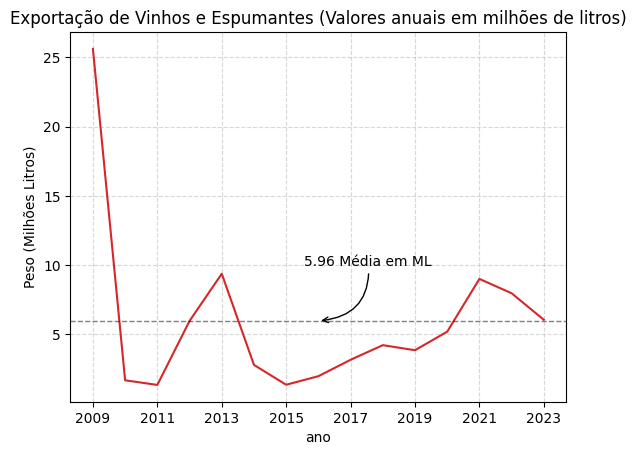

In [ ]:
plt.figure(figsize=(12,6))
fig, ax2 = plt.subplots()

anos = df_exp_total_por_ano.index
xticks = df_exp_total_por_ano.index.to_list()

color = 'tab:red'
y = df_exp_total_por_ano['peso_Ml']
ax2.set_xlabel('ano')
ax2.set_ylabel('Peso (Milhões Litros)')
ax2.plot(anos, y, color=color)
ax2.tick_params(axis='y')
ax2.set_xticks(xticks[::2])
media_peso_Ml = df_exp_total_por_ano['peso_Ml'].mean()
plt.axhline(media_peso_Ml, linestyle='--', color='k', linewidth=1, alpha=0.5)


plt.title("Exportação de Vinhos e Espumantes (Valores anuais em milhões de litros)")
plt.grid(linestyle='--', alpha=0.5)

#fazer uma nota no grafico
plt.annotate(f'{media_peso_kg_M:.2f} Média em ML', xy=(2016, media_peso_kg_M), xytext=(-10, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.5'), color='k')

plt.show()

In [ ]:
df_exp_espumante_pivot['País'] = df_exp_espumante_pivot['País'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8'))
df_exp_espumante_pivot

,País,ano,peso_l,valor_usd
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461
...,...,...,...,...
1540,India,2019,18,40
1541,India,2020,25,80
1542,India,2021,0,26
1543,India,2022,0,0


In [ ]:
df_exp_espumante_pivot['País'] = df_exp_espumante_pivot['País'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8'))
df_exp_espumante_pivot

,País,ano,peso_l,valor_usd
0,Alemanha,2009,6648,29018
1,Alemanha,2010,1958,6877
2,Alemanha,2011,1976,12018
3,Alemanha,2012,833,5072
4,Alemanha,2013,5809,30461
...,...,...,...,...
1540,India,2019,18,40
1541,India,2020,25,80
1542,India,2021,0,26
1543,India,2022,0,0


# **Produção de vinhos**

In [ ]:
df_prod_vinho = pd.read_csv('http://vitibrasil.cnpuv.embrapa.br/download/Producao.csv', sep=';')
df_prod_vinho

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336
8,9,SUCO,SUCO,1097771,2296654,3509440,0,0,0,0,...,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079,67045238
9,10,su_Suco de uva simples,Suco de uva integral,1097771,2296654,3509440,0,0,0,0,...,43331223,52233155,31117869,46865626,34367996,50239767,40718523,68038479,35248305,38122173


In [ ]:
df_prod_vinho =df_prod_vinho.loc[[0,4,14]]
df_prod_vinho.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
14,15,DERIVADOS,DERIVADOS,14164329,13280518,12314509,28317919,47904934,53633143,22925012,...,62907281,107349704,53950314,109116761,95202101,142888747,92533804,169031493,138501226,174716647


In [ ]:
df_prod_vinho = df_prod_vinho.drop(columns = [str(y) for y in range(1970,2009)])
df_prod_vinho

,id,control,produto,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
14,15,DERIVADOS,DERIVADOS,56787892,51210756,85748723,100757101,64072127,62907281,107349704,53950314,109116761,95202101,142888747,92533804,169031493,138501226,174716647


In [ ]:
df_prod_vinho.columns[3:]

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [ ]:
df_prod_vinho_melt = pd.melt(df_prod_vinho, id_vars=['produto'], value_vars= df_prod_vinho.columns[3:],
                  var_name='ano', value_name='producao')
df_prod_vinho_melt

,produto,ano,producao
0,VINHO DE MESA,2009,205418206
1,VINHO FINO DE MESA (VINIFERA),2009,39900568
2,DERIVADOS,2009,56787892
3,VINHO DE MESA,2010,195267980
4,VINHO FINO DE MESA (VINIFERA),2010,24805713
5,DERIVADOS,2010,51210756
6,VINHO DE MESA,2011,257840749
7,VINHO FINO DE MESA (VINIFERA),2011,47598471
8,DERIVADOS,2011,85748723
9,VINHO DE MESA,2012,212777037


In [ ]:
df_prod_vinho_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   produto   45 non-null     object
 1   ano       45 non-null     object
 2   producao  45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
df_prod_vinho_melt['ano'] = df_prod_vinho_melt['ano'].astype(int)
df_prod_vinho_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   produto   45 non-null     object
 1   ano       45 non-null     int64 
 2   producao  45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df_prod_vinho_pivot = df_prod_vinho_melt.pivot_table(index=['ano'], columns='produto', values='producao').reset_index()
df_prod_vinho_pivot

produto,ano,DERIVADOS,VINHO DE MESA,VINHO FINO DE MESA (VINIFERA)
0,2009,56787892,205418206,39900568
1,2010,51210756,195267980,24805713
2,2011,85748723,257840749,47598471
3,2012,100757101,212777037,45200730
4,2013,64072127,196904222,45782530
5,2014,62907281,196173123,38464314
6,2015,107349704,210308560,37148982
7,2016,53950314,86319015,18070626
8,2017,109116761,255015187,44537870
9,2018,95202101,218375636,38707220


In [ ]:
df_prod_vinho_pivot.columns = ['ano',  'derivados','vinho_mesa','vinho_fino']
df_prod_vinho_pivot

,ano,derivados,vinho_mesa,vinho_fino
0,2009,56787892,205418206,39900568
1,2010,51210756,195267980,24805713
2,2011,85748723,257840749,47598471
3,2012,100757101,212777037,45200730
4,2013,64072127,196904222,45782530
5,2014,62907281,196173123,38464314
6,2015,107349704,210308560,37148982
7,2016,53950314,86319015,18070626
8,2017,109116761,255015187,44537870
9,2018,95202101,218375636,38707220


In [ ]:
df_prod_vinho_pivot['prod_total'] = df_prod_vinho_pivot['derivados'] + df_prod_vinho_pivot['vinho_mesa'] + df_prod_vinho_pivot['vinho_fino']
df_prod_vinho_pivot

,ano,derivados,vinho_mesa,vinho_fino,prod_total
0,2009,56787892,205418206,39900568,302106666
1,2010,51210756,195267980,24805713,271284449
2,2011,85748723,257840749,47598471,391187943
3,2012,100757101,212777037,45200730,358734868
4,2013,64072127,196904222,45782530,306758879
5,2014,62907281,196173123,38464314,297544718
6,2015,107349704,210308560,37148982,354807246
7,2016,53950314,86319015,18070626,158339955
8,2017,109116761,255015187,44537870,408669818
9,2018,95202101,218375636,38707220,352284957


In [ ]:
df_prod_vinho_pivot['prod_total_Ml'] = df_prod_vinho_pivot['prod_total']/1_000_000
df_prod_vinho_pivot

,ano,derivados,vinho_mesa,vinho_fino,prod_total,prod_total_Ml
0,2009,56787892,205418206,39900568,302106666,302.106666
1,2010,51210756,195267980,24805713,271284449,271.284449
2,2011,85748723,257840749,47598471,391187943,391.187943
3,2012,100757101,212777037,45200730,358734868,358.734868
4,2013,64072127,196904222,45782530,306758879,306.758879
5,2014,62907281,196173123,38464314,297544718,297.544718
6,2015,107349704,210308560,37148982,354807246,354.807246
7,2016,53950314,86319015,18070626,158339955,158.339955
8,2017,109116761,255015187,44537870,408669818,408.669818
9,2018,95202101,218375636,38707220,352284957,352.284957


In [ ]:
df_prod_vinho_pivot = df_prod_vinho_pivot.set_index('ano')

<Figure size 1200x600 with 0 Axes>

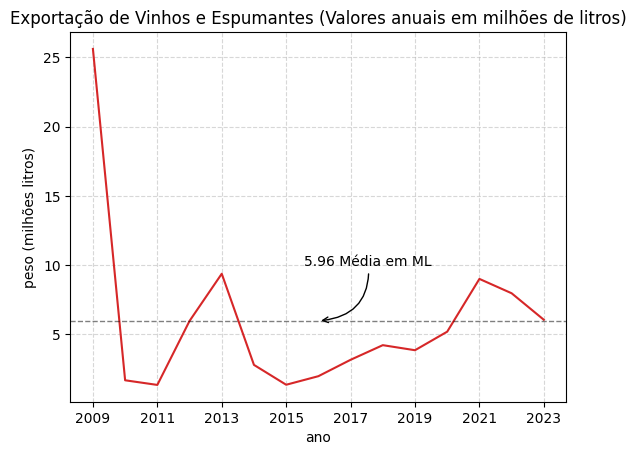

In [ ]:
plt.figure(figsize=(12,6))
fig, ax2 = plt.subplots()

anos = df_prod_vinho_pivot.index
xticks = df_prod_vinho_pivot.index.to_list()

color = 'tab:red'
y = df_exp_total_por_ano['peso_Ml']
ax2.set_xlabel('ano')
ax2.set_ylabel('peso (milhões litros)')
ax2.plot(anos, y, color=color)
ax2.tick_params(axis='y')
ax2.set_xticks(xticks[::2])
media_peso_Ml = df_exp_total_por_ano['peso_Ml'].mean()
plt.axhline(media_peso_Ml, linestyle='--', color='k', linewidth=1, alpha=0.5)


plt.title("Exportação de Vinhos e Espumantes (Valores anuais em milhões de litros)")
plt.grid(linestyle='--', alpha=0.5)

#fazer uma nota no grafico
plt.annotate(f'{media_peso_kg_M:.2f} Média em ML', xy=(2016, media_peso_kg_M), xytext=(-10, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.5'), color='k')

plt.show()

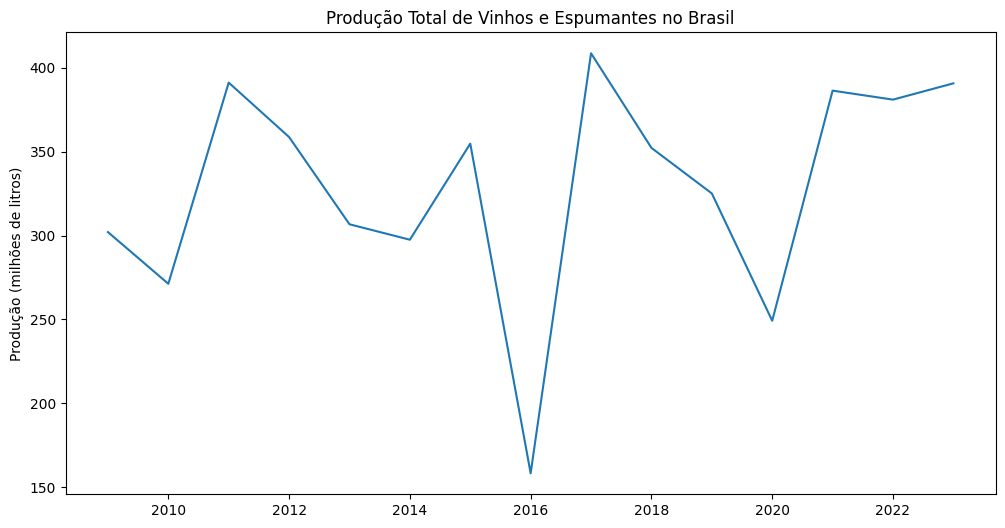

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df_prod_vinho_pivot.index,df_prod_vinho_pivot['prod_total_Ml'])
plt.title("Produção Total de Vinhos e Espumantes no Brasil")
plt.ylabel("Produção (milhões de litros)")
plt.show()

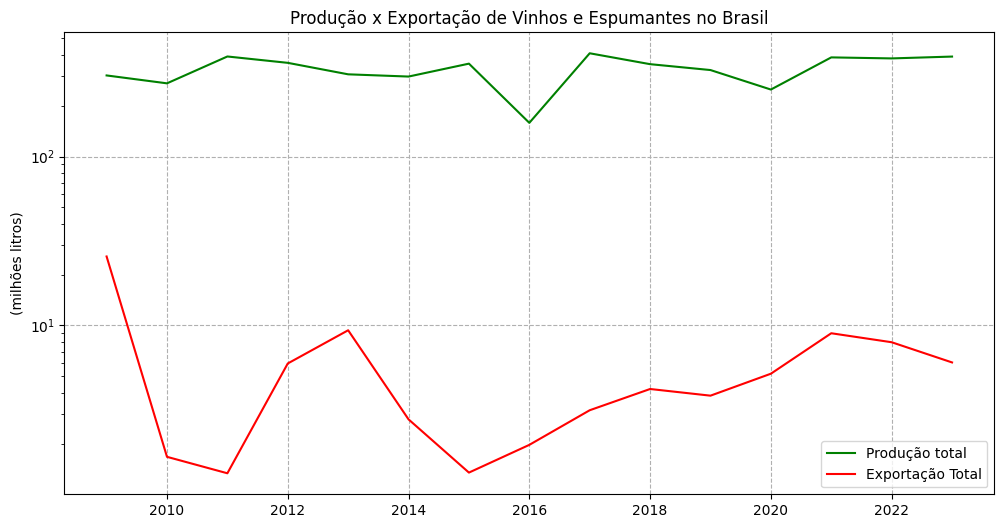

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df_prod_vinho_pivot.index,df_prod_vinho_pivot['prod_total_Ml'],color = 'green')
plt.plot(df_exp_total_por_ano.index,df_exp_total_por_ano['peso_Ml'],color = 'red')
plt.title("Produção x Exportação de Vinhos e Espumantes no Brasil")
plt.ylabel("(milhões litros)")
plt.legend(["Produção total","Exportação Total"])
plt.yscale("log")
plt.grid(ls="--")
#plt.grid(ls="--",alpha=0,5) -- alpha é a transparencia, default é 1
plt.show()

In [ ]:
representatividade_exportacao = df_exp_total_por_ano['peso_Ml']/df_prod_vinho_pivot['prod_total_Ml']*100
representatividade_exportacao

ano
2009    8.478280
2010    0.615157
2011    0.340901
2012    1.660324
2013    3.053687
2014    0.934604
2015    0.379377
2016    1.240644
2017    0.770564
2018    1.194103
2019    1.181439
2020    2.078767
2021    2.327705
2022    2.088247
2023    1.546215
dtype: float64

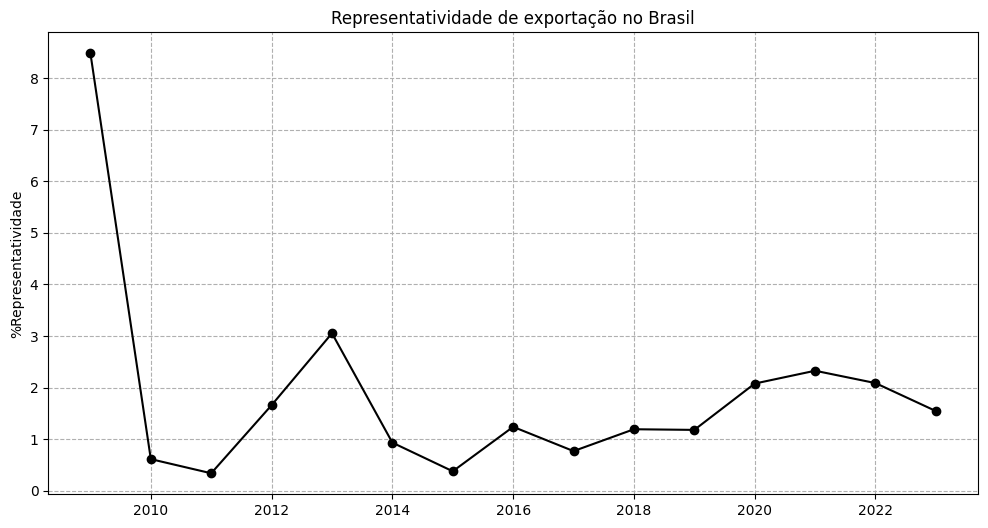

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(representatividade_exportacao,color = 'black', marker = 'o')
plt.title("Representatividade de exportação no Brasil")
plt.ylabel("%Representatividade")
plt.grid(ls="--")
#plt.grid(ls="--",alpha=0,5) -- alpha é a transparencia, default é 1
plt.show()

In [ ]:
df_prod_vinho_pivot.head()

,derivados,vinho_mesa,vinho_fino,prod_total,prod_total_Ml
ano,,,,,
2009,56787892,205418206,39900568,302106666,302.106666
2010,51210756,195267980,24805713,271284449,271.284449
2011,85748723,257840749,47598471,391187943,391.187943
2012,100757101,212777037,45200730,358734868,358.734868
2013,64072127,196904222,45782530,306758879,306.758879


In [ ]:
df_exp_total_por_ano ['pct_var_peso'] = df_exp_total_por_ano['peso_Ml'].pct_change()*100
df_exp_total_por_ano.head()

,peso_Ml,valor_usd_M,usd_por_l,pct_var_peso
ano,,,,
2009,25.613448,9.331441,128.387072,NaN
2010,1.668825,3.696220,164.385000,-93.484575
2011,1.333562,4.220781,211.847290,-20.089764
2012,5.956160,6.362991,253.819395,346.635402
2013,9.367457,23.697020,199.113362,57.273428


In [ ]:
#df_exp_total_por_ano['pct_var_peso'].fillna('-', inplace = True)
#df_exp_total_por_ano

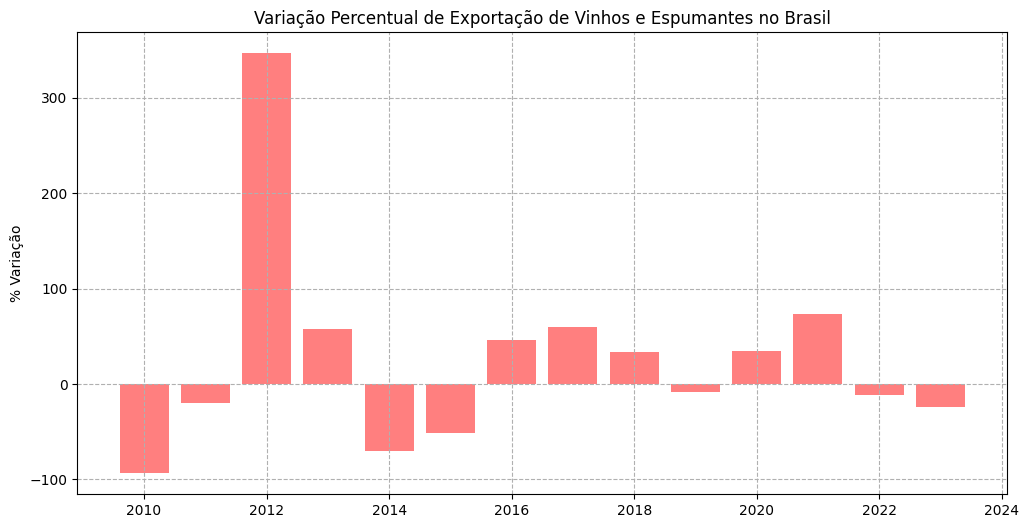

In [ ]:
plt.figure(figsize=(12,6))

plt.bar(df_exp_total_por_ano.index,df_exp_total_por_ano['pct_var_peso'],color = 'red',alpha=0.5)
plt.title("Variação Percentual de Exportação de Vinhos e Espumantes no Brasil")
plt.ylabel("% Variação")
plt.grid(ls="--")
#plt.grid(ls="--",alpha=0,5) -- alpha é a transparencia, default é 1
plt.show()